# FORECAST OF THE INFLATION IN HAITI FROM June 2020 TO December 2020

### By : Chasnick Desir
##### Saturday , September 11, 2021

INTRODUCTION

    A.	Background
    B.	Problem 
    C.	Audience
    
RESEARCH PROBLEM

HYPOTHESES

DATA SOURCES

I.DATA WRANGLING

    A. Data Loading & Cleaning
    B. Data Transformation
    C. Functions

II.EXPLORATORY DATA ANALYSIS

    A.Descriptive Analysis
    B.Bivariate Analysis
    
III.MULTIVARIATE TIME SERIES ANALYSIS

    III. 1.-MULTIVARIATE TIME SERIES ANALYSIS ANALYSIS (WITH MONTHLY US IMPORT-EXPORT TO HAITI)
    
        A.Stationarity
        B.Long-Term Correlations
        C.Modelling & Forecasting
   
    III. 2.MULTIVARIATE TIME SERIES ANALYSIS ANALYSIS (WITHOUT MONTHLY US IMPORT-EXPORT TO HAITI)
   
        A.Stationarity
        B.Long-Term Correlations
        C.Modelling & Forecasting

IV.	ANALYTICAL MODELS
    
    A.	Document techniques 
    B.	Document uncertainties
    C.	Performance of different models


V.	DISCUSSION AND CONCLUSION

    A.	Solution to the problem
    B.	Further directions


### INTRODUCTION

For several years we have been witnessing a quasi-cyclical rise in the prices of consumer goods.
In economics, this global and continuous increase is called inflation.
Public policies should be aimed at limiting this inflation, but we are witnessing the impotence of public authorities and the non-result of the applied public policies.

We see fluctuations every time the dollar rises, or gas prices at the pump.
As a DataAnalyst and a Haitian citizen, I asked myself what my contribution to the fight against inflation could be.

It occurred to me to try to predict the future variation of the inflation rate in Haiti over the next few months.

A prediction of this macro indicator will allow companies and investors to prepare for these possible variations, to integrate these variations in their economic decisions.
This forecast will be able to bring elements of solutions in their fight against inflation if it is heard by the public authorities.


# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

-A positive change in the money supply leads to a positive change in the inflation rate.

-An increase in the exchange rate leads to a positive change in the inflation rate.

-A positive correlation between the BRH policy rate and the inflation rate.

-(A positive correlation between the fluctuation of the trade balance and the inflation rate).

# Data Source

All data were collected on a monthly basis.
The variables collected are:
        
         -The USD-HTG Exchange Rate: `end_rate`, which represents the value of 1 US Dollar in terms of Haitian Gourdes at the end of each month;
        
         -The USA's Imports from Haiti and the USA's Exports to Haiti: `us_imp_ht` and `us_exp_ht`, which represent respectively values in US dollars of US' Imports and Exports with Haiti. Those Imports and Exports have been used as a proxy for the Real GDP, whose records of Monthly values couldn't be found. Actually, 76% of Haiti's GDP is imputable to its trade with other countries [(World Bank, 2018)](https://import-export.societegenerale.fr/en/country/haiti/trade-country-risk). The USA are Haiti's first trade partner, with 84% of Haitian Exports heading straight to the USA and 20% of Haitian Exports (the highest), coming from the USA. 
        
         -Inflation: `inf`, which is the percent change in Haiti's Consumer Price Index, relative to same month of previous year.

         -M3 : Money supply including M2 and deposits in Dollars.
            
Data Source:
+ [Haiti's Central Bank](brh.ht)

Haitian Central Bank are supposed to be run by experts, to produce and collect relevant economic data in Haiti in order to make them available and open to anyone who need to make any research. They definitely should be trusted on being reliable. In the next sections, the data will loaded, cleaned and analyzed.

# Data Cleaning
    Review data types
    Analytical Transformations
    Treatment of Missing Values

I.DATA WRANGLING

Lets's start importing necessary packages

In [1]:
#Packages for reading and data manipulation
import pandas as pd
import numpy as np

#import sklearn
import sklearn

In [2]:
#Import data
agregat=pd.read_excel("agregatsmon.xls")
TxDirecteur=pd.read_excel("Book2-Tx d'interetsdirecteurdelabrh.xlsx")
Import_Export=pd.read_excel("Monthly-US Import_Export To Haiti.xlsx")

In [3]:
#Read data
agregat

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,INDICATEURS DE DOLLARISATION,NaN,NaN,NaN,NaN
1,NaN,M1,M2,M3,NaN,M1,M2,M3,NaN,TAUX DE CHANGE BRH,...,Avoirs Extér.nets Système banc (millions de Gd...,Avoirs Extér.Bruts Bques. Commerc. (millions d...,Engagem. Extér. Bques. Commerc. (millions de G...,Avoirs Extér.Nets Bques. Commerc. (millions de...,NaN,Dépot $/Dép.tot.,Crédit $/Dépot $,Crédit $/Crédit total,Dépot $/M3,NaN
2,Date,( En millions de gourdes ),NaN,NaN,NaN,( En millions de dollars É.U. ),NaN,NaN,NaN,(Fin de période),...,( En millions de Gdes ),( En millions de Gdes ),( En millions de Gdes ),( En millions de Gdes ),NaN,( En pourcentage ),( En pourcentage ),( En pourcentage ),( En pourcentage ),NaN
3,1958-09-01 00:00:00,90.0407,122.1179,NaN,NaN,18.00814,24.42358,NaN,NaN,5,...,3.8306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1959-09-01 00:00:00,85.6913,119.3291,NaN,NaN,17.13826,23.86582,NaN,NaN,5,...,-12.5101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,M3: Masse monétaire incluant M2 et les dépôts ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,DAV= dépôts à vue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,DE= dépôts dépargne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,DT=dépôts totaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop unnecessary rows
agregat= agregat.drop(labels=[0], axis=0)
agregat= agregat.drop(labels=[1,2,509,510,511,512,513,514], axis=0)
agregat= agregat.drop(labels=[505,506,507,508], axis=0)

#Rename columns
agregat.rename(columns= {"Unnamed: 9" : "ChangeRate", "Unnamed: 3" : "M3" , "Unnamed: 0" : "Date" , "Unnamed: 23": "InflationRate" }, inplace=True)

In [5]:
#Select relevant columns
agregat1=agregat[['Date','M3','ChangeRate','InflationRate']]

In [6]:
#Drop NaN rows
agregat1.dropna(subset = ["M3",'ChangeRate','InflationRate'], inplace=True)

<ipython-input-6-ba243150f062>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agregat1.dropna(subset = ["M3",'ChangeRate','InflationRate'], inplace=True)


In [7]:
#Convert data columns type in columns int64
agregat1['M3']=agregat1['M3'].astype('float64')
agregat1['ChangeRate']=agregat1['ChangeRate'].astype('float64')
agregat1['InflationRate']=agregat1['InflationRate'].astype('float64')

#Show dataframe
agregat1

<ipython-input-7-4da13ee5b206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agregat1['M3']=agregat1['M3'].astype('float64')
<ipython-input-7-4da13ee5b206>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agregat1['ChangeRate']=agregat1['ChangeRate'].astype('float64')
<ipython-input-7-4da13ee5b206>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,Date,M3,ChangeRate,InflationRate
169,1992-09-01 00:00:00,6197.900000,10.1780,17.57
170,1992-10-01 00:00:00,6380.500000,10.5090,16.93
171,1992-11-01 00:00:00,6506.700000,11.3540,15.73
172,1992-12-01 00:00:00,6864.500000,10.9530,15.92
173,1993-01-01 00:00:00,7013.751400,11.6500,16.37
...,...,...,...,...
499,2020-03-30 00:00:00,407524.171420,97.9728,22.00
500,2020-04-30 00:00:00,427783.389260,102.8348,22.30
501,2020-05-31 00:00:00,447677.408120,108.9426,23.40
502,2020-06-30 00:00:00,466234.701919,113.3133,24.80


In [8]:
#Set end date
agregat1['Date'] = pd.date_range(start='Sep 1992', periods = len(agregat1), freq='M')

<ipython-input-8-100cac66bfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agregat1['Date'] = pd.date_range(start='Sep 1992', periods = len(agregat1), freq='M')


In [9]:
#Set columns Date as index

agregat1.set_index('Date', inplace=True)
agregat1

,M3,ChangeRate,InflationRate
Date,,,
1992-09-30,6197.900000,10.1780,17.57
1992-10-31,6380.500000,10.5090,16.93
1992-11-30,6506.700000,11.3540,15.73
1992-12-31,6864.500000,10.9530,15.92
1993-01-31,7013.751400,11.6500,16.37
...,...,...,...
2020-03-31,407524.171420,97.9728,22.00
2020-04-30,427783.389260,102.8348,22.30
2020-05-31,447677.408120,108.9426,23.40


In [10]:
#Show TxDirecteur dataset
TxDirecteur

,Unnamed: 0,Unnamed: 1
0,Taux nominal sur Bons BRH,NaN
1,NaN,NaN
2,Date,Taux des bonds a 91 Jours
3,1996-12-30 00:00:00,0.194
4,1997-01-30 00:00:00,0.172
...,...,...
854,NaN,NaN
855,2020-10-30 00:00:00,0.1
856,NaN,NaN
857,NaN,NaN


In [11]:
#drop unnecessary rows
TxDirecteur= TxDirecteur.drop(labels=[0,1,2], axis=0)
#Rename columns
TxDirecteur.rename(columns= {"Unnamed: 0" : "Date", "Unnamed: 1" : "PoliciesRate"}, inplace=True)
TxDirecteur

,Date,PoliciesRate
3,1996-12-30 00:00:00,0.194
4,1997-01-30 00:00:00,0.172
5,1997-02-27 00:00:00,0.157
6,1997-03-30 00:00:00,0.153
7,1997-04-30 00:00:00,0.179
...,...,...
854,NaN,NaN
855,2020-10-30 00:00:00,0.1
856,NaN,NaN
857,NaN,NaN


In [12]:
#Multiply Policies rate by 100 in prevision to logarithmic uses
TxDirecteur['PoliciesRate']=(TxDirecteur['PoliciesRate']*100)

In [13]:
#Convert data columns type to datetime
#TxDirecteur['Date']= pd.to_datetime(TxDirecteur['Date'])
TxDirecteur['Date']=TxDirecteur['Date'].astype('datetime64')

#Convert data columns type in columns int64
TxDirecteur['PoliciesRate']=TxDirecteur['PoliciesRate'].astype('float64')

TxDirecteur

,Date,PoliciesRate
3,1996-12-30,19.4
4,1997-01-30,17.2
5,1997-02-27,15.7
6,1997-03-30,15.3
7,1997-04-30,17.9
...,...,...
854,NaT,NaN
855,2020-10-30,10.0
856,NaT,NaN
857,NaT,NaN


In [14]:
#Drop NaN rows
TxDirecteur.dropna(subset = ["Date", "PoliciesRate"], inplace=True)

In [15]:
#Set end date
TxDirecteur['Date'] = pd.date_range(start='Dec 1996', periods = len(TxDirecteur), freq='M')

In [16]:
#Set columns Date as index
TxDirecteur= TxDirecteur.set_index('Date') #or use df.set_index('Date', inplace=True) 
TxDirecteur

,PoliciesRate
Date,
1996-12-31,19.4
1997-01-31,17.2
1997-02-28,15.7
1997-03-31,15.3
1997-04-30,17.9
...,...
2020-07-31,10.0
2020-08-31,10.0
2020-09-30,10.0


In [17]:
Import_Export

,date,US_IMP_HT,US_EXP_HT
0,1985M1,31.200000,31.200000
1,1985M2,30.400000,31.800000
2,1985M3,36.700000,31.900000
3,1985M4,33.200000,32.900000
4,1985M5,31.000000,35.300000
...,...,...,...
422,2020M3,89.632097,121.447966
423,2020M4,33.779661,98.304938
424,2020M5,31.120985,138.548968
425,2020M6,58.066942,86.973292


In [18]:
#Convert data in millions USD
Import_Export['US_IMP_HT'] = Import_Export['US_IMP_HT']*(10**6)
Import_Export['US_EXP_HT'] = Import_Export['US_EXP_HT']*(10**6)
Import_Export

,date,US_IMP_HT,US_EXP_HT
0,1985M1,31200000.0,31200000.0
1,1985M2,30400000.0,31800000.0
2,1985M3,36700000.0,31900000.0
3,1985M4,33200000.0,32900000.0
4,1985M5,31000000.0,35300000.0
...,...,...,...
422,2020M3,89632097.0,121447966.0
423,2020M4,33779661.0,98304938.0
424,2020M5,31120985.0,138548968.0
425,2020M6,58066942.0,86973292.0


In [19]:
#Make Colunms date in format comprehensible for computer
Import_Export['date'] = pd.date_range(start='Jan 1985', periods = len(Import_Export), freq='M')

In [20]:
#Drop NaN rows
Import_Export.dropna(subset = ["date", "US_IMP_HT",'US_EXP_HT'], inplace=True)

In [21]:
#Set date as index for Import_Export DataFrame
Import_Export.set_index('date', inplace=True)
Import_Export

,US_IMP_HT,US_EXP_HT
date,,
1985-01-31,31200000.0,31200000.0
1985-02-28,30400000.0,31800000.0
1985-03-31,36700000.0,31900000.0
1985-04-30,33200000.0,32900000.0
1985-05-31,31000000.0,35300000.0
...,...,...
2020-02-29,79661596.0,100645336.0
2020-03-31,89632097.0,121447966.0
2020-04-30,33779661.0,98304938.0


In [22]:
##Create definitive dataset
Inf_Forecast = pd.concat([agregat1, TxDirecteur, Import_Export], axis=1)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,US_IMP_HT,US_EXP_HT
1985-01-31,NaN,NaN,NaN,NaN,31200000.0,31200000.0
1985-02-28,NaN,NaN,NaN,NaN,30400000.0,31800000.0
1985-03-31,NaN,NaN,NaN,NaN,36700000.0,31900000.0
1985-04-30,NaN,NaN,NaN,NaN,33200000.0,32900000.0
1985-05-31,NaN,NaN,NaN,NaN,31000000.0,35300000.0
...,...,...,...,...,...,...
2020-07-31,496401.876294,119.6664,25.7,10.0,NaN,NaN
2020-08-31,NaN,NaN,NaN,10.0,NaN,NaN
2020-09-30,NaN,NaN,NaN,10.0,NaN,NaN
2020-10-31,NaN,NaN,NaN,10.0,NaN,NaN


In [23]:
#Drop NaN rows from definitive dataframe
Inf_Forecast.dropna(subset = ["US_IMP_HT",'US_EXP_HT','M3', 'ChangeRate',"InflationRate", "PoliciesRate"], inplace=True)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,US_IMP_HT,US_EXP_HT
1996-12-31,14708.789700,15.0928,14.607501,19.4,13900000.0,34600000.0
1997-01-31,14921.796700,16.2599,15.074644,17.2,8400000.0,33200000.0
1997-02-28,14931.797100,16.1117,15.185226,15.7,12000000.0,36100000.0
1997-03-31,15432.994500,16.5056,16.874242,15.3,14500000.0,40700000.0
1997-04-30,15478.822900,16.6913,16.384732,17.9,16400000.0,40200000.0
...,...,...,...,...,...,...
2020-02-29,391545.303564,94.3711,20.800000,15.0,79661596.0,100645336.0
2020-03-31,407524.171420,97.9728,22.000000,10.0,89632097.0,121447966.0
2020-04-30,427783.389260,102.8348,22.300000,10.0,33779661.0,98304938.0
2020-05-31,447677.408120,108.9426,23.400000,10.0,31120985.0,138548968.0


In [24]:
#Make Import/Export columns in Gourdes
Inf_Forecast["IMP_HT"]=(Inf_Forecast['US_IMP_HT']*Inf_Forecast['ChangeRate'])
Inf_Forecast['EXP_HT']= (Inf_Forecast['US_EXP_HT']*Inf_Forecast['ChangeRate'])
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,US_IMP_HT,US_EXP_HT,IMP_HT,EXP_HT
1996-12-31,14708.789700,15.0928,14.607501,19.4,13900000.0,34600000.0,2.097899e+08,5.222109e+08
1997-01-31,14921.796700,16.2599,15.074644,17.2,8400000.0,33200000.0,1.365832e+08,5.398287e+08
1997-02-28,14931.797100,16.1117,15.185226,15.7,12000000.0,36100000.0,1.933404e+08,5.816324e+08
1997-03-31,15432.994500,16.5056,16.874242,15.3,14500000.0,40700000.0,2.393312e+08,6.717779e+08
1997-04-30,15478.822900,16.6913,16.384732,17.9,16400000.0,40200000.0,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...,...
2020-02-29,391545.303564,94.3711,20.800000,15.0,79661596.0,100645336.0,7.517752e+09,9.498011e+09
2020-03-31,407524.171420,97.9728,22.000000,10.0,89632097.0,121447966.0,8.781508e+09,1.189860e+10
2020-04-30,427783.389260,102.8348,22.300000,10.0,33779661.0,98304938.0,3.473725e+09,1.010917e+10
2020-05-31,447677.408120,108.9426,23.400000,10.0,31120985.0,138548968.0,3.390401e+09,1.509388e+10


In [25]:
#Make columns M3 in millions gourdes
Inf_Forecast['M3']=Inf_Forecast['M3']*(10**6)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,US_IMP_HT,US_EXP_HT,IMP_HT,EXP_HT
1996-12-31,1.470879e+10,15.0928,14.607501,19.4,13900000.0,34600000.0,2.097899e+08,5.222109e+08
1997-01-31,1.492180e+10,16.2599,15.074644,17.2,8400000.0,33200000.0,1.365832e+08,5.398287e+08
1997-02-28,1.493180e+10,16.1117,15.185226,15.7,12000000.0,36100000.0,1.933404e+08,5.816324e+08
1997-03-31,1.543299e+10,16.5056,16.874242,15.3,14500000.0,40700000.0,2.393312e+08,6.717779e+08
1997-04-30,1.547882e+10,16.6913,16.384732,17.9,16400000.0,40200000.0,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...,...
2020-02-29,3.915453e+11,94.3711,20.800000,15.0,79661596.0,100645336.0,7.517752e+09,9.498011e+09
2020-03-31,4.075242e+11,97.9728,22.000000,10.0,89632097.0,121447966.0,8.781508e+09,1.189860e+10
2020-04-30,4.277834e+11,102.8348,22.300000,10.0,33779661.0,98304938.0,3.473725e+09,1.010917e+10
2020-05-31,4.476774e+11,108.9426,23.400000,10.0,31120985.0,138548968.0,3.390401e+09,1.509388e+10


In [26]:
#Drop non-necessary columns as US_IMP_HT/US_EXP_HT
Inf_Forecast.drop(['US_IMP_HT','US_EXP_HT'], axis = 1, inplace=True)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...
2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


Transform data to neperian logarithmic scale and store as lodgf. First , i check if there is any null or negative values.

In [27]:
# First we check if any value is negative or null
Inf_Forecast[Inf_Forecast.iloc[:,1:]<=0].count()

M3               0
ChangeRate       0
InflationRate    7
PoliciesRate     0
IMP_HT           0
EXP_HT           0
dtype: int64

In [28]:
#Reset dataframe Index
Inf_reset=Inf_Forecast.reset_index()
Inf_reset

,index,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
0,1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1,1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
2,1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
3,1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
4,1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...
278,2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
279,2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
280,2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
281,2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


In [29]:
#Identify negative InflationRate rows
# get names of indexes for which
# column InflationRate has negative value

Negative = Inf_reset[ Inf_reset['InflationRate'] <0 ].head(10)
Negative

,index,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
149,2009-05-31,9.559570e+10,40.816200,-0.373367,6.0,2.106283e+09,3.159032e+09
150,2009-06-30,9.777979e+10,41.159600,-1.047443,5.0,2.322292e+09,2.369395e+09
151,2009-07-31,9.840801e+10,41.448183,-2.484848,5.0,2.277892e+09,3.024977e+09
152,2009-08-31,9.934983e+10,41.433523,-2.800000,5.0,2.104256e+09,2.664261e+09
153,2009-09-30,1.030114e+11,41.773717,-4.700000,5.0,2.068130e+09,2.511386e+09
154,2009-10-31,1.027515e+11,42.027071,-3.482881,5.0,1.871110e+09,2.663701e+09
155,2009-11-30,1.018583e+11,42.027071,-0.785973,5.0,1.932918e+09,2.802145e+09


Remove negative InflationRate rows to be able use neperian logaritmic transformation.

In [30]:
#drop unnecessary rows
Inf_reset= Inf_reset.drop(labels=[149,150,151,152,153,154,155], axis=0)
Inf_reset

,index,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
0,1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1,1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
2,1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
3,1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
4,1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...
278,2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
279,2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
280,2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
281,2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


In [31]:
#Rename index columns as date
Inf_reset.rename(columns={"index": "Date"} , inplace=True)


In [32]:
#Found len Inf_reset
len(Inf_reset)

276

In [33]:
#Create dataframe in neperian logarithm scale
Inf_Reset_log=np.log(Inf_reset.groupby('Date').mean())
Inf_Reset_log

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
1996-12-31,23.411711,2.714218,2.681535,2.965273,19.161617,20.073582
1997-01-31,23.426089,2.788702,2.713014,2.844909,18.732444,20.106762
1997-02-28,23.426759,2.779546,2.720323,2.753661,19.079963,20.181349
1997-03-31,23.459774,2.803700,2.825788,2.727853,19.293359,20.325438
1997-04-30,23.462739,2.814888,2.796350,2.884801,19.427680,20.324265
...,...,...,...,...,...,...
2020-02-29,26.693367,4.547235,3.034953,2.708050,22.740533,22.974348
2020-03-31,26.733366,4.584690,3.091042,2.302585,22.895914,23.199686
2020-04-30,26.781883,4.633124,3.104587,2.302585,21.968493,23.036709


### Create function for ease of task

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

# Create function for making subplots

def viz(Inf_Forecast, size=(15,15), row=3, col=2, rotation=90, title=False, xlab=False, ylab=False, name=None):
    fig = plt.figure(figsize=size)
    fig.subplots_adjust(hspace=0.4, wspace=0.1)
    
    for i in range(1,len(Inf_Forecast.columns)+1):
        ax = fig.add_subplot(row, col, i)
        if title==False:
            ax.set_title(Inf_Forecast.columns[i-1])
        else:
            ax.set_title(title[i-1], size=16)

        if xlab==False:
            ax.set_xlabel(None)
        else:
            ax.set_xlabel(xlab, size=14)
    
        if ylab==False:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel(ylab, size=14)
                
        plt.plot(Inf_Forecast.iloc[:,i-1])
           
        ax.set_xticks(Inf_Forecast.index)
        ax.set_xticklabels(labels=(Inf_Forecast.index), rotation=rotation)

    plt.gcf()
    plt.savefig(name, bbox_inches='tight', transparent=False)
    plt.show()

In [35]:
def viz_stack(data=Inf_Reset_log, size=(20,10), col1='', col2='', col3=None,
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='Inflation Rate', s2='Exchange Rate', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 1.- Evolution of Exchange and Inflation rates', 
            name='graphs/end_rate-inf'):
    
    '''Function for building stacked line graphs'''
    
    
    plt.figure(figsize=size)
    
    if col3 == None:
        plt.plot(data[col1], linewidth=3)
        plt.plot(data[col2], linewidth=3)

        plt.xticks(data.index, rotation=45, size=13)
        plt.yticks(size=13)
    
        plt.text(x=x1, y=y1, s=s1, size=13, rotation=rot1)
        plt.text(x=x2, y=y2, s=s2, size=13, rotation=rot2)

        plt.xlabel('Dates', size=15)
        plt.ylabel('Values', size=15)

        plt.title(title, size=17)

        plt.gcf()
        plt.savefig(name, bbox_inches='tight', transparent=False)
        plt.show()
        
    else:
        plt.plot(data[col2], linewidth=3)
        plt.plot(data[col1], linewidth=3)
        plt.plot(data[col3], linewidth=3)

        plt.xticks(data.index, rotation=90, size=13)
        plt.yticks(size=13)
    
        plt.text(x=x1, y=y1, s=s1, size=13, rotation=rot1)
        plt.text(x=x2, y=y2, s=s2, size=13, rotation=rot2)
        plt.text(x=x3, y=y3, s=s3, size=13, rotation=rot2)

        plt.xlabel('Dates', size=15)
        plt.ylabel('Values', size=15)

        plt.title(title, size=17)

        plt.gcf()
        plt.savefig(name, bbox_inches='tight', transparent=False)
        plt.show()

### II. EXPLORATORY DATA ANALYSIS <a name="eda"></a>

 This study will allow us, through the joint analysis of the inflation rate and the other variables, to understand how the evolution of one affects the evolution of the other.

### A. Descriptive Analysis <a name="describe"></a>

We are looking on the series over 276 months of observation: from December 1996 to June 2020.

In [36]:
Inf_reset.describe()

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
count,2.760000e+02,276.000000,276.000000,276.000000,2.760000e+02,2.760000e+02
mean,1.264039e+11,42.668436,12.974166,13.149710,2.427371e+09,3.624961e+09
std,1.053935e+11,19.634502,6.840953,7.572376,2.110395e+09,2.734574e+09
min,1.470879e+10,15.092800,0.062539,3.000000,1.365832e+08,5.222109e+08
25%,3.655110e+10,29.464000,7.924277,7.600000,6.770399e+08,1.476835e+09
50%,8.950740e+10,40.358300,12.450000,12.000000,1.724036e+09,2.799328e+09
75%,1.756651e+11,45.627755,15.942103,18.000000,3.477844e+09,4.720041e+09
max,4.662347e+11,113.313300,38.404605,27.830000,1.165812e+10,1.509388e+10


In [37]:
Inf_reset

,Date,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
0,1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1,1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
2,1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
3,1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
4,1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...,...
278,2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
279,2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
280,2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
281,2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


   + The Exchange Rate's value at the end of any month has remained under 49 HTG for 1 USD, from  January 2014 to April 2015; this was under the administration of President Michel J. Martelly and Prime Minister Evans Paul, [with Charles Castel as the Governor of the Central Bank](https://www.brh.ht/discours-dinstallation-du-gouverneur-de-la-brh/). It has remained less than 63 HTG for 1 USD, before August 2016, during [the last period of elections in Haiti](https://fr.wikipedia.org/wiki/%C3%89lection_pr%C3%A9sidentielle_ha%C3%AFtienne_de_2015). It still didn't go beyond 67 HTG for 1 USD until before December 2017, [10 months after President Jovenel Moïse got into duty](https://fr.wikipedia.org/wiki/Jovenel_Mo%C3%AFse) and [2 years after Jean Baden Dubois replaced Governor Charles Castel](https://lenouvelliste.com/article/153722/jean-baden-dubois-remplace-charles-castel-comme-gouverneur-de-la-brh). And finally, the `USD-HTG Exchange Rate` did nothing but keep spiking from January 2018 to nowadays (August 2020), [under President Jovenel Moïse and Governor Jean Baden Dubois](https://www.brh.ht/la-brh/conseil-dadministration/jean-baden-dubois/).Since the last month , we can see the positive trend for the change rate.


   + The country has a mean two-figure positive inflation rate: 12.97% in average, which is bad for the economy, since there is no significant production.


   + The USA imports goods from Haiti for a value of 78.5 million USD monthly, and has exported goods to Haiti for a value of 106.7 million monthly. This is to say that we have maintained an average gap of 28.2 million USD monthly with our first and main business partner.  

   + We also observe that the money supply M3 has been growing during these 276 months.

Now let's visualize the time series.

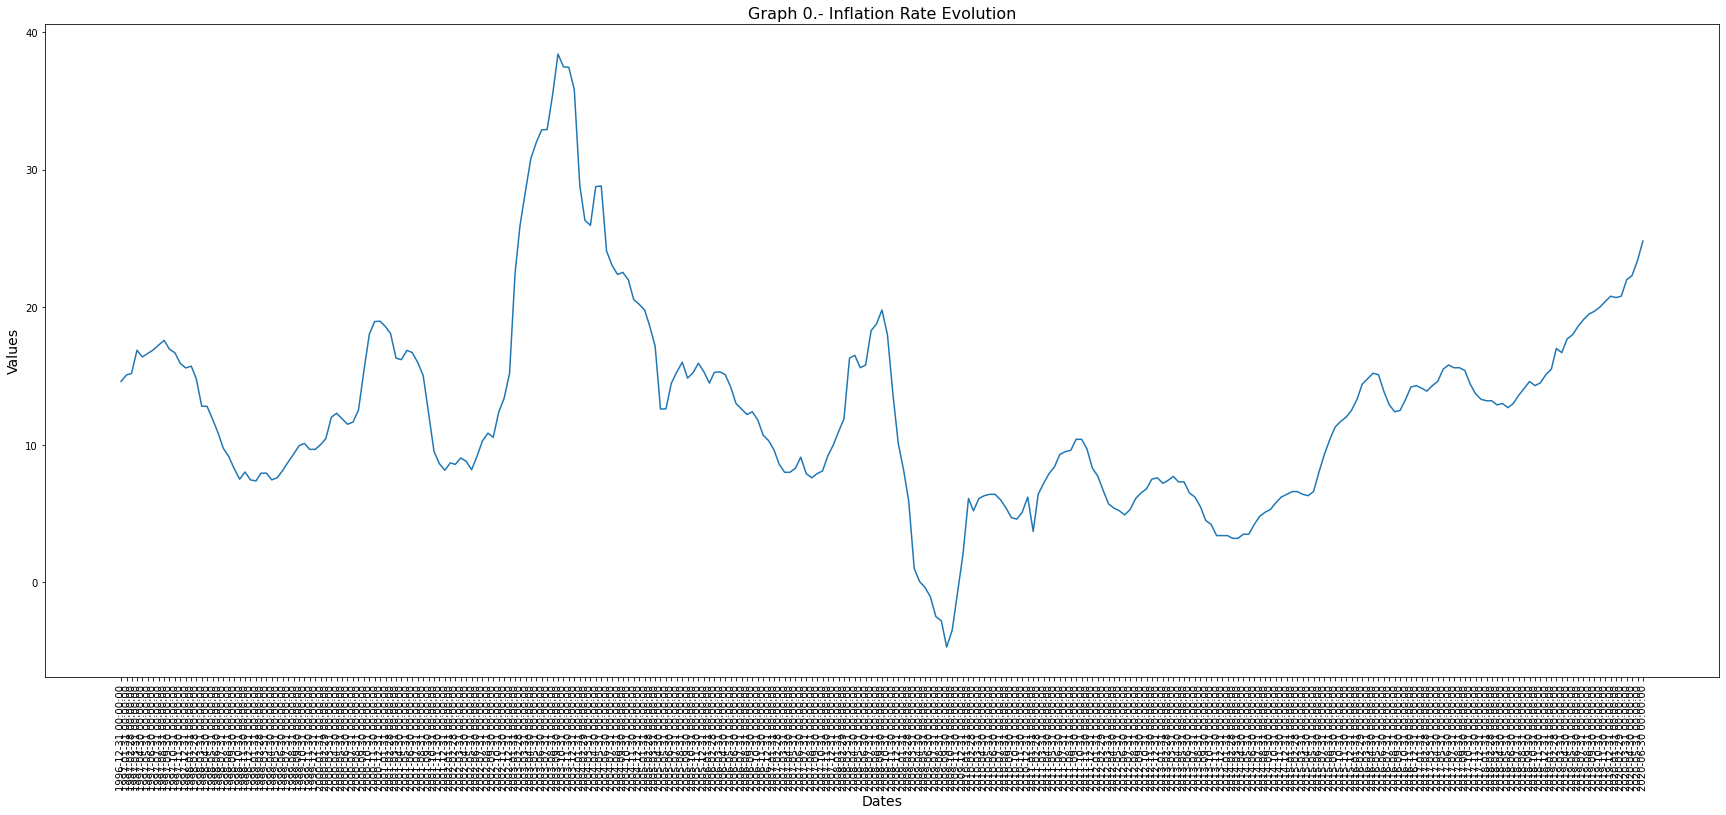

In [38]:
#Visualise Change Rate
viz(Inf_Forecast[['InflationRate']], (30,12), 1, 1, xlab='Dates', ylab='Values', 
    title=['Graph 0.- Inflation Rate Evolution'], 
    name='graphs/Inflation Rate Evolution')

 + We note that the year-on-year inflation rate fluctuates almost randomly. From 1996 to 2020, the highest inflation peak was reached in September 2003. At that time Haiti was facing a popular protest movement following the assassination of Amiot Metayer (https://www.dial-infos.org/09_breves/pays/hi03.html) and reached its lowest level in October 2009. According to the newspaper *Relief Web*, during this period Haiti experienced a drop of about 40% in the price of food products (*National Rice, Corn and others*) consecutive to an increase in the level of transfers. (https://reliefweb.int/report/haiti/ha%C3%AFti-s%C3%A9curit%C3%A9-alimentaire-nette-am%C3%A9lioration-en-octobre-2009)



### B. Bivariate Analysis <a name="bi-anal"></a>

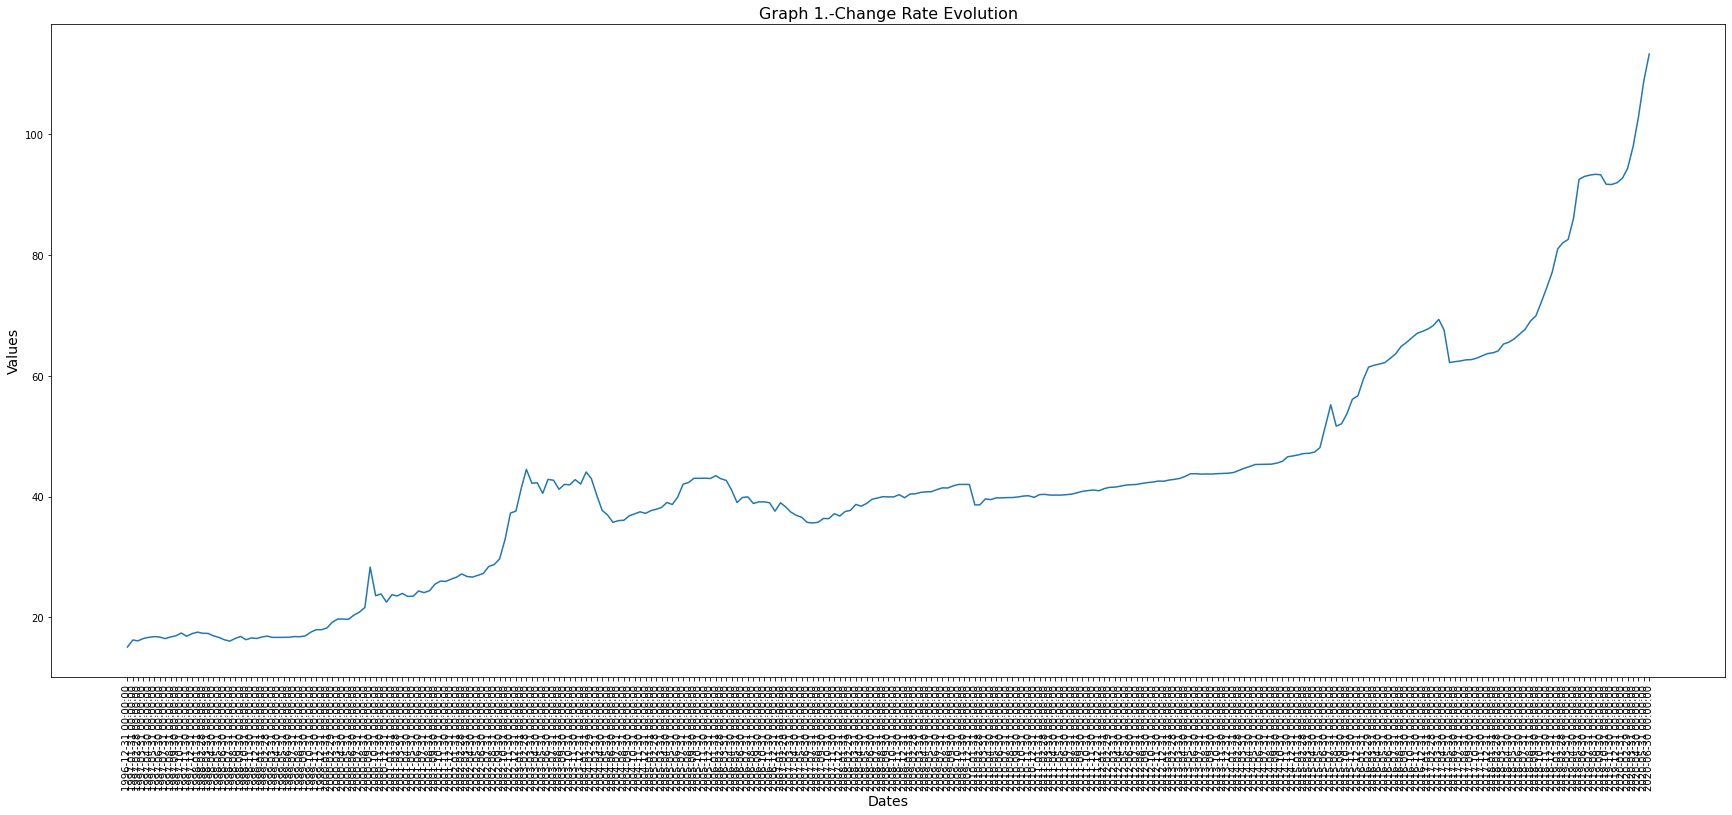

In [39]:
#Visualise Change Rate
viz(Inf_Forecast[['ChangeRate']], (30,12), 1, 1, xlab='Dates', ylab='Values', 
    title=['Graph 1.-Change Rate Evolution'], 
    name='graphs/Change Rate Evolution')

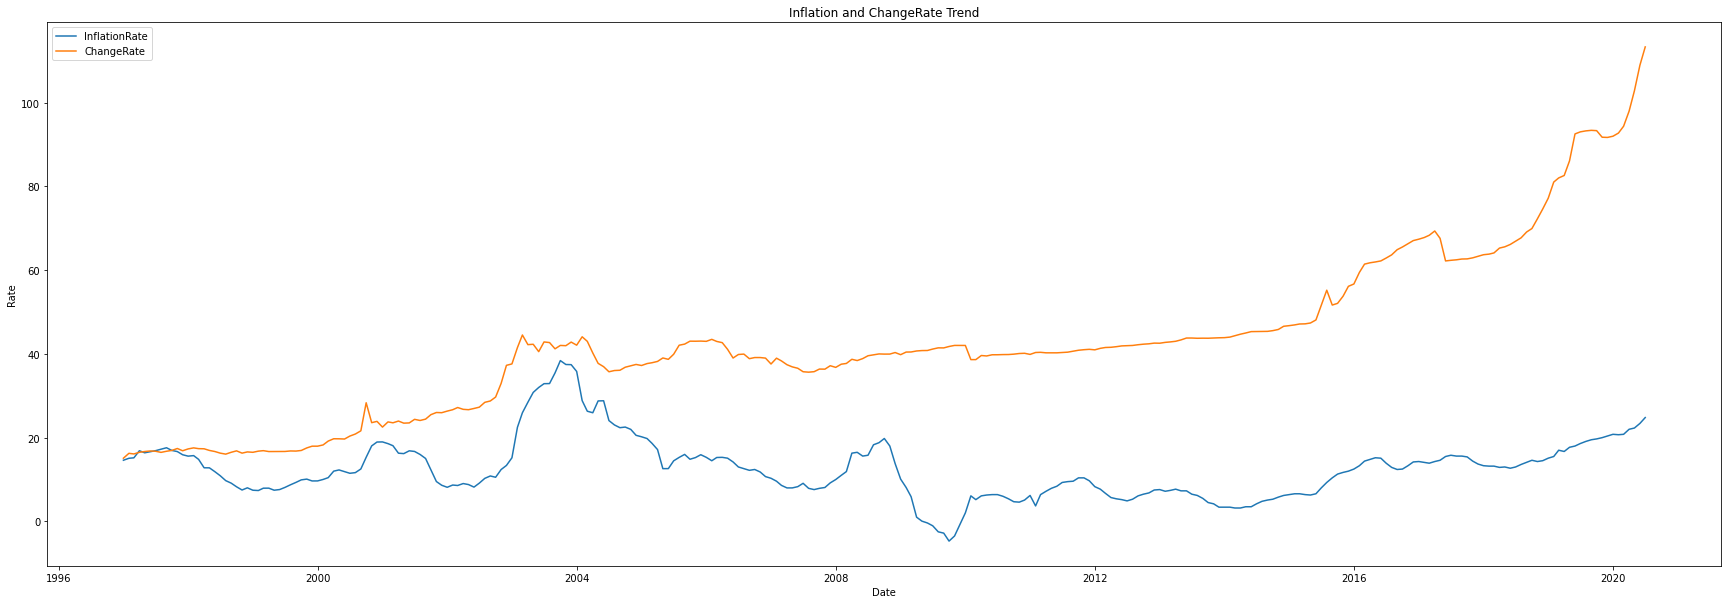

In [40]:
#Visualise Change Rate
#viz(Inf_Forecast[['InflationRate']], (30,12), 1, 1, xlab='Dates', ylab='Values', 
#    title=['Graph 0.- Inflation and Change Rate Evolution'], 
#    name='graphs/Inflation and Rate Evolution')

#Visualise Change and inflation Rate
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_Forecast[['InflationRate', 'ChangeRate']])
#line_chart2 = plt.plot(Inf_Forecast[['InflationRate', 'M3']])
plt.title('Inflation and ChangeRate Trend')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend(['InflationRate','ChangeRate'])
plt.show()

Inflation varies the same as the exchange rate, those series are very likely to be positively correlated. This is to say that the inflation tends to be high when the Exchange rate is high and vice versa. 

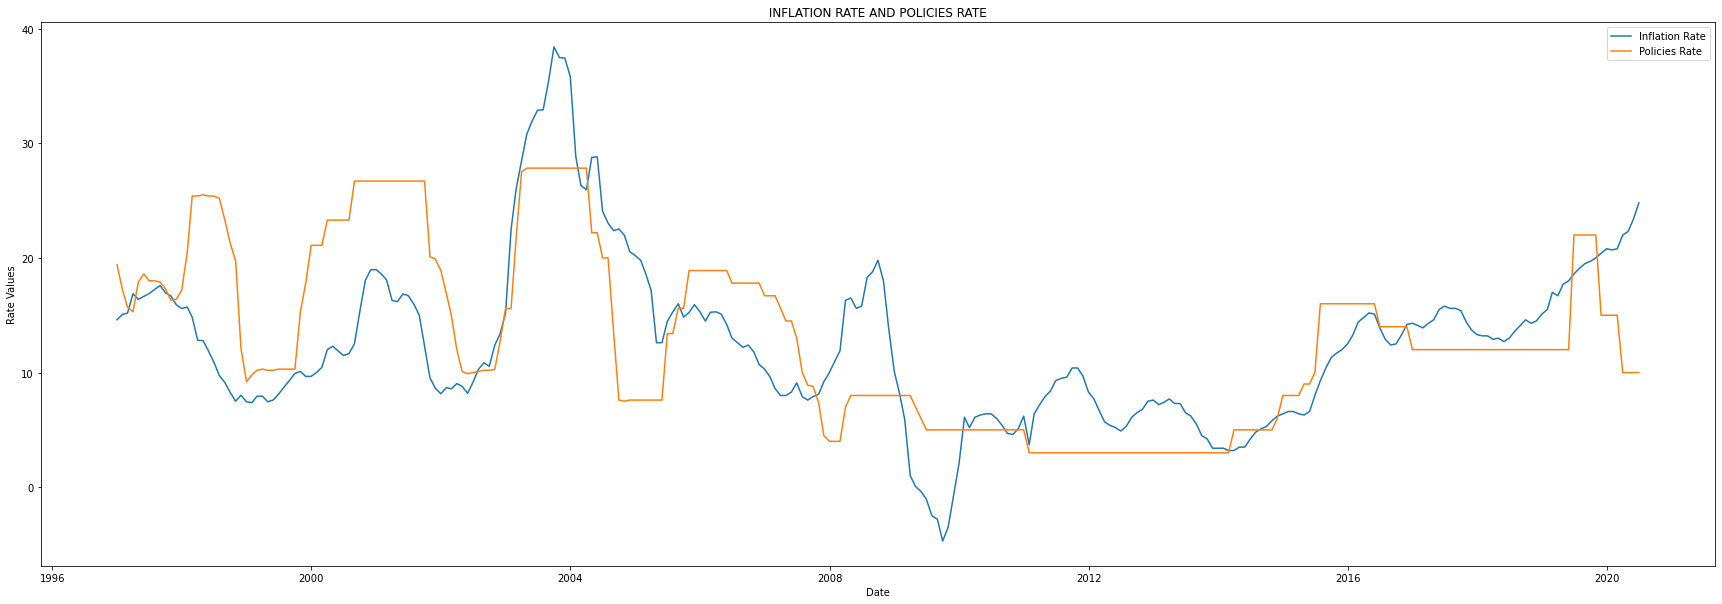

In [41]:
#Show predict and real values
plt.figure(figsize=(30, 10))
plt.plot(Inf_Forecast['InflationRate'], label = "Inflation Rate")
plt.plot(Inf_Forecast['PoliciesRate'], label = "Policies Rate")
plt.legend()
plt.title(' INFLATION RATE AND POLICIES RATE ')
plt.xlabel('Date')
plt.ylabel('Rate Values')
plt.show()

If at certain times there seems to be positive correlations between the policy rate and the inflation rate, at other times there seems to be a disconnect between the fluctuations of the policy rate and the inflation rate, which indicates that external factors influence the inflation rate in these periods.
Among these external factors we can mention the protests of 2003 and some peaks of foreign transfers as in 2009.

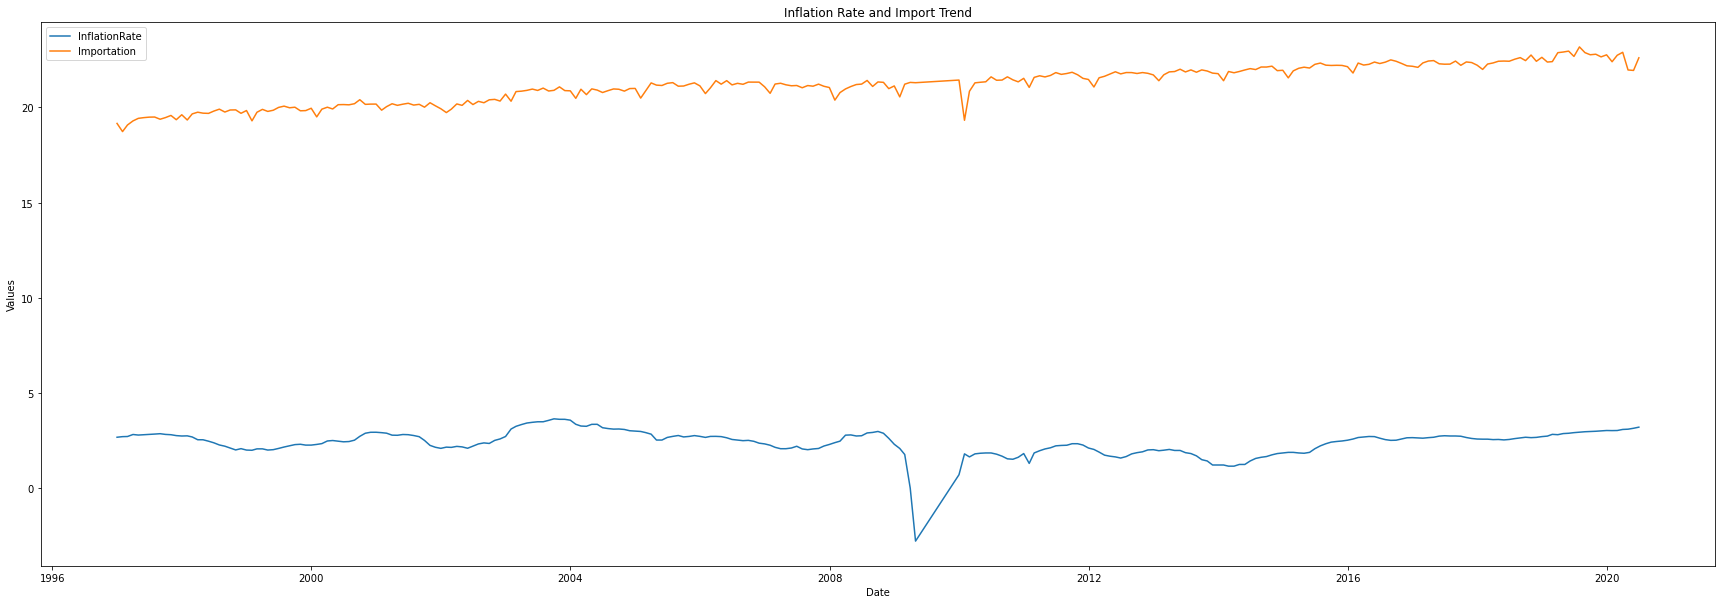

In [42]:
#Visualise Change Rate and Import at Log scale
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_Reset_log[['InflationRate', 'IMP_HT']])
#line_chart2 = plt.plot(Inf_Forecast[['InflationRate', 'M3']])
plt.title('Inflation Rate and Import Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['InflationRate','Importation'])
plt.show()

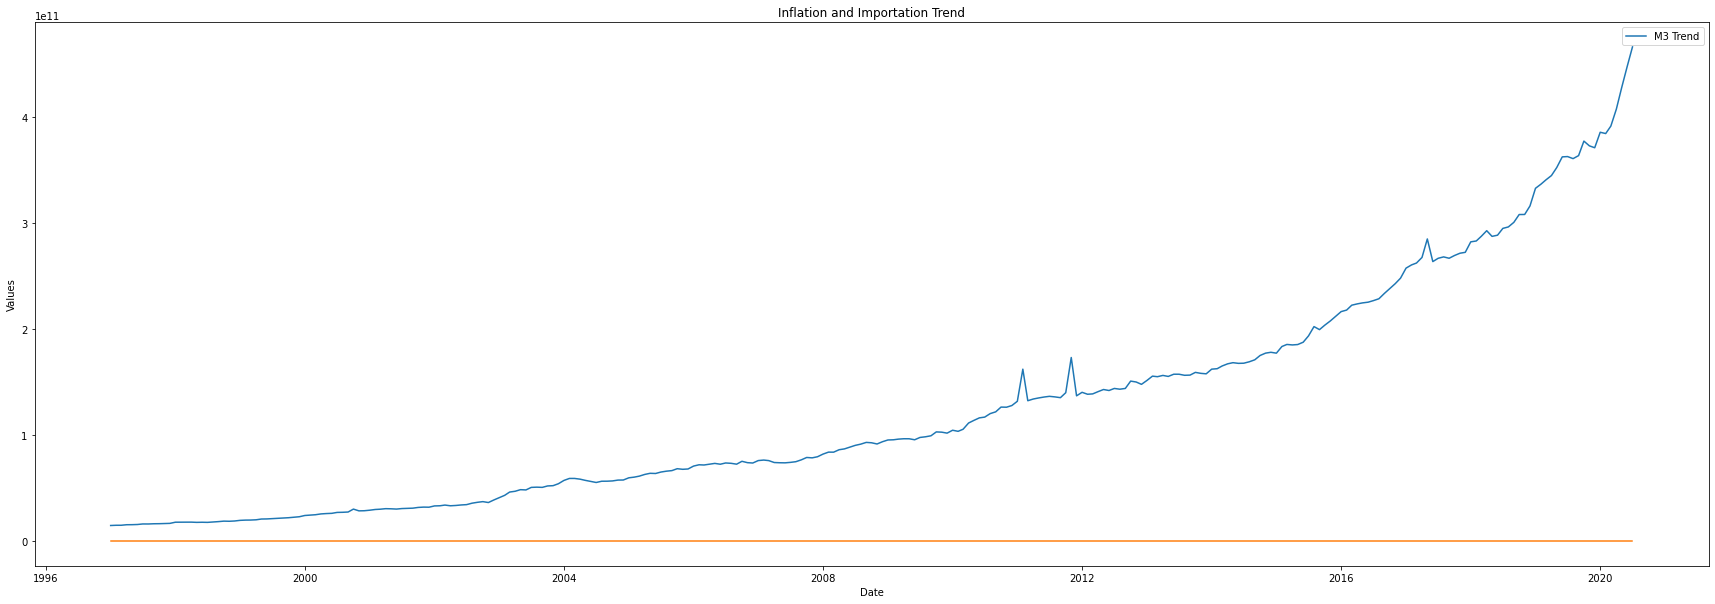

In [43]:
#Visualise Change and inflation Rate
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_Forecast[['M3','InflationRate']])
#line_chart2 = plt.plot(Inf_Forecast[['InflationRate', 'M3']])
plt.title('Inflation and Importation Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['M3 Trend'])
plt.show()

The Graph above doesn't give a proper grasp of how inflation rates vary relative to M3, imports and exports, because `InflationRate` is of the order of tens, whereas `IMP_HT`, `EXP_HT` and `M3` are of the order of millions.To resolve this problem, Let's explore these variables on unstacked line graphs instead!

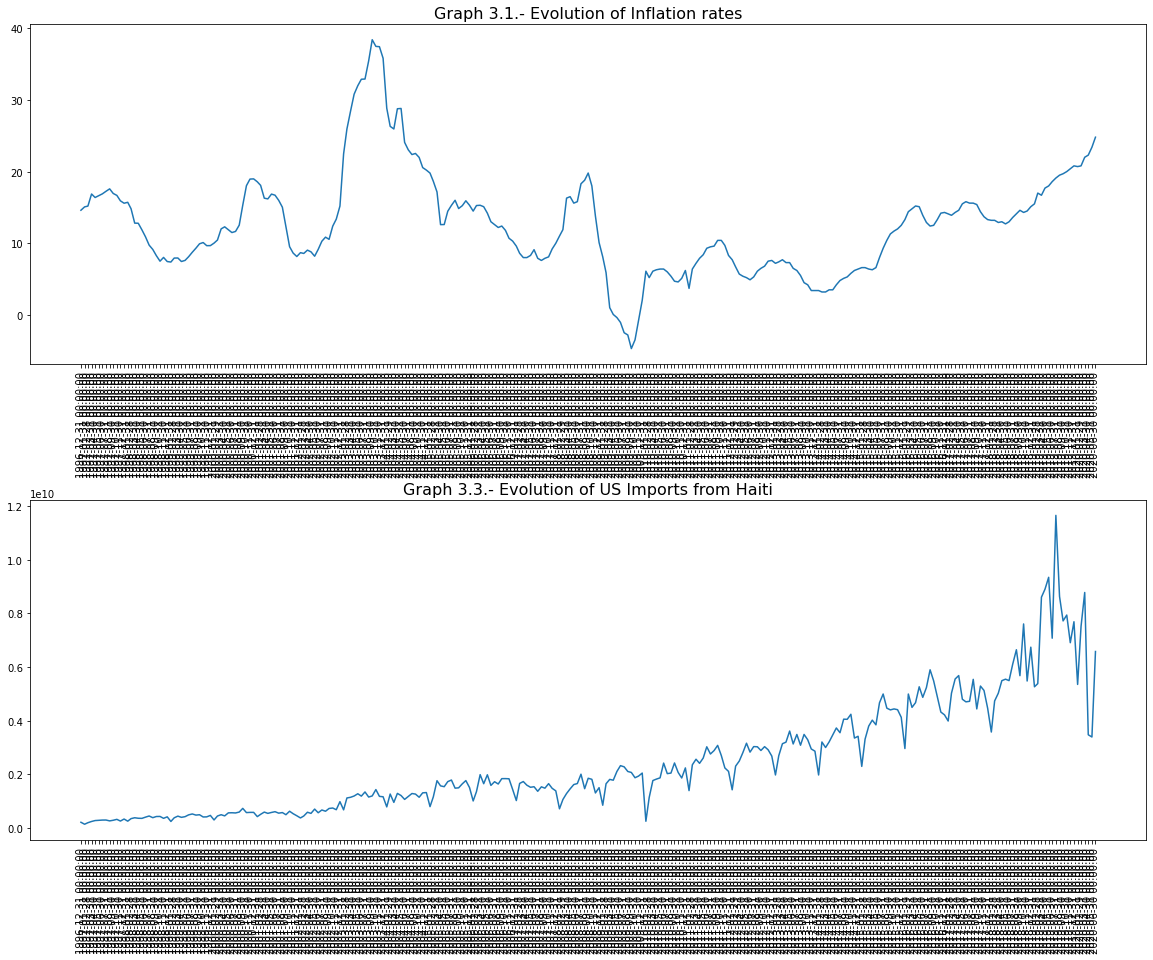

In [44]:
#Inflation Rate and us import
viz(Inf_Forecast[['InflationRate', 'IMP_HT']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Inflation rates', 
             'Graph 3.3.- Evolution of US Imports from Haiti'],
    name='graphs/end_rate-exp')

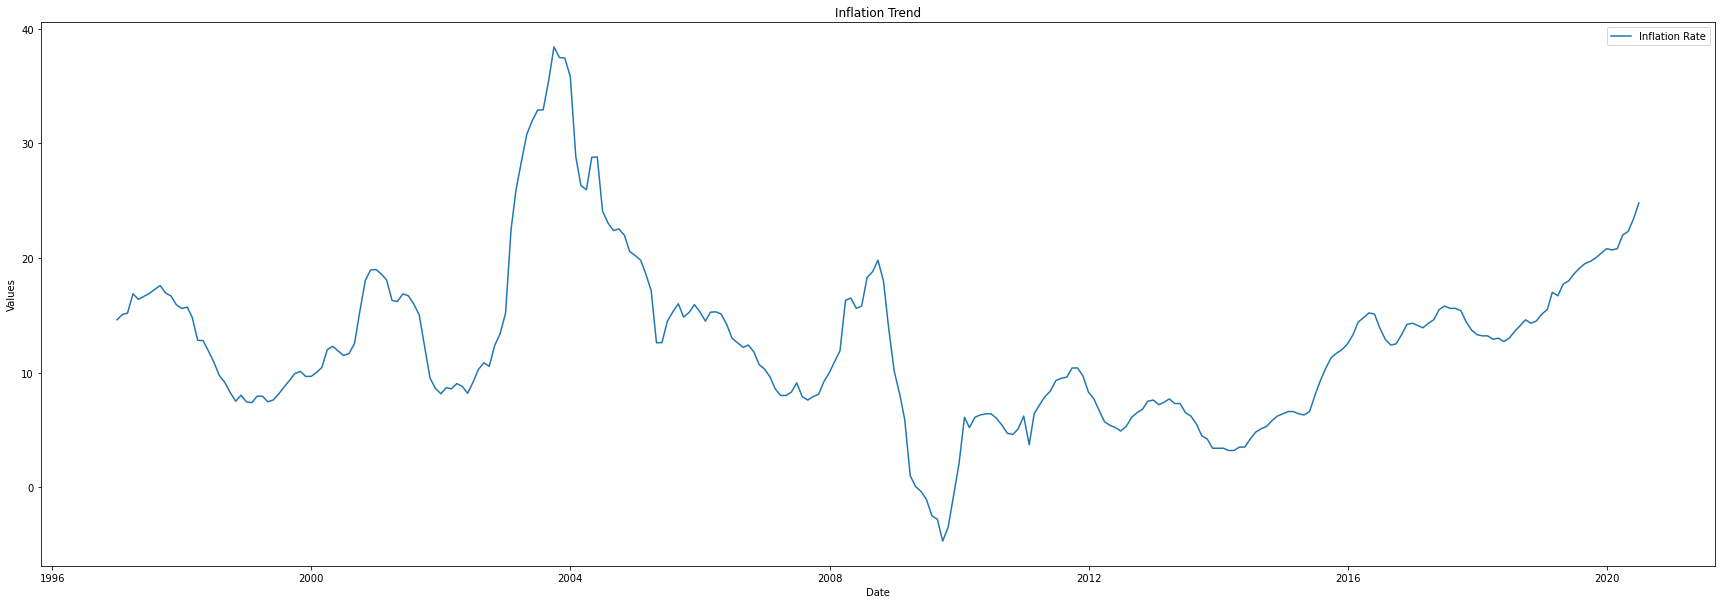

In [45]:
#Visualise Change and inflation Rate
plt.figure(figsize=(30, 10))
#line_chart1 = plt.plot(Inf_Forecast[['IMP_HT']])
line_chart2 = plt.plot(Inf_Forecast['InflationRate'])
plt.title('Inflation Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['Inflation Rate'])
plt.show()

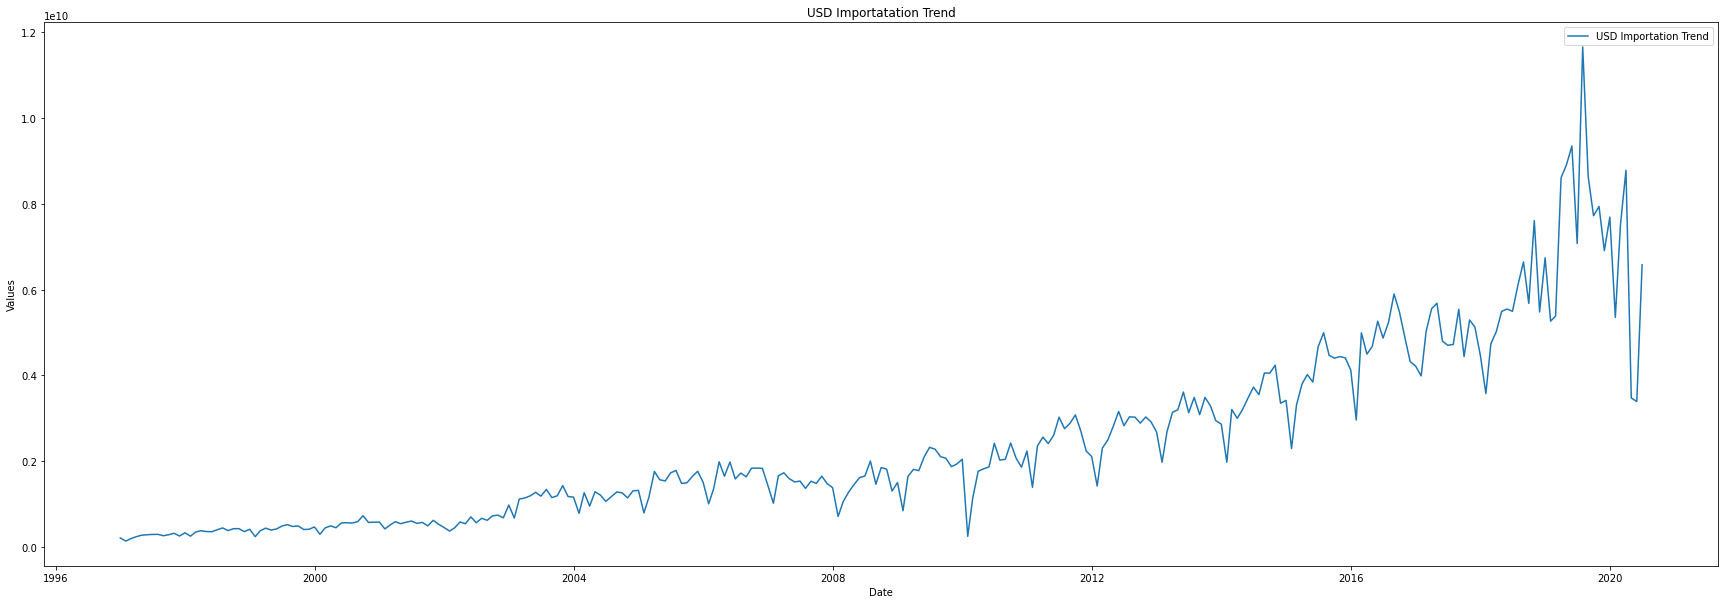

In [46]:
#Visualise Change and inflation Rate
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_Forecast[['IMP_HT']])
#line_chart2 = plt.plot(Inf_Forecast['InflationRate'])
plt.title('USD Importatation Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend([ 'USD Importation Trend'])
plt.show()

The first thing to note is the seasonality in the US Imports. A seasonality is a regularity that happens at the very same period of each period group. For example, the USA imports drops dramatically in January of every year, sometimes down to 20M USD.
We can also see some correlation in the upward trends of imports and inflation.

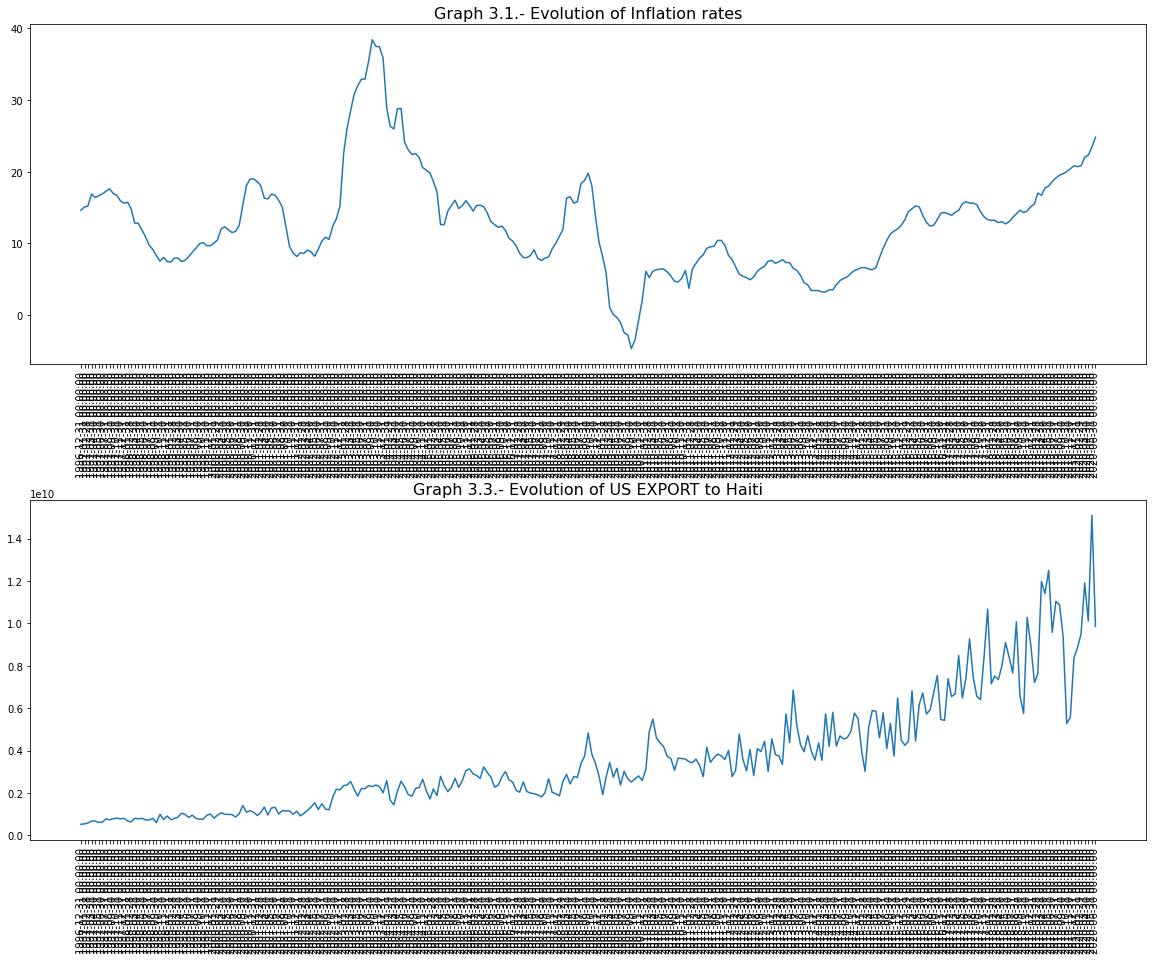

In [47]:
#Inflation Rate and us export
viz(Inf_Forecast[['InflationRate', 'EXP_HT']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Inflation rates', 
             'Graph 3.3.- Evolution of US EXPORT to Haiti'],
    name='graphs/end_rate-imp')

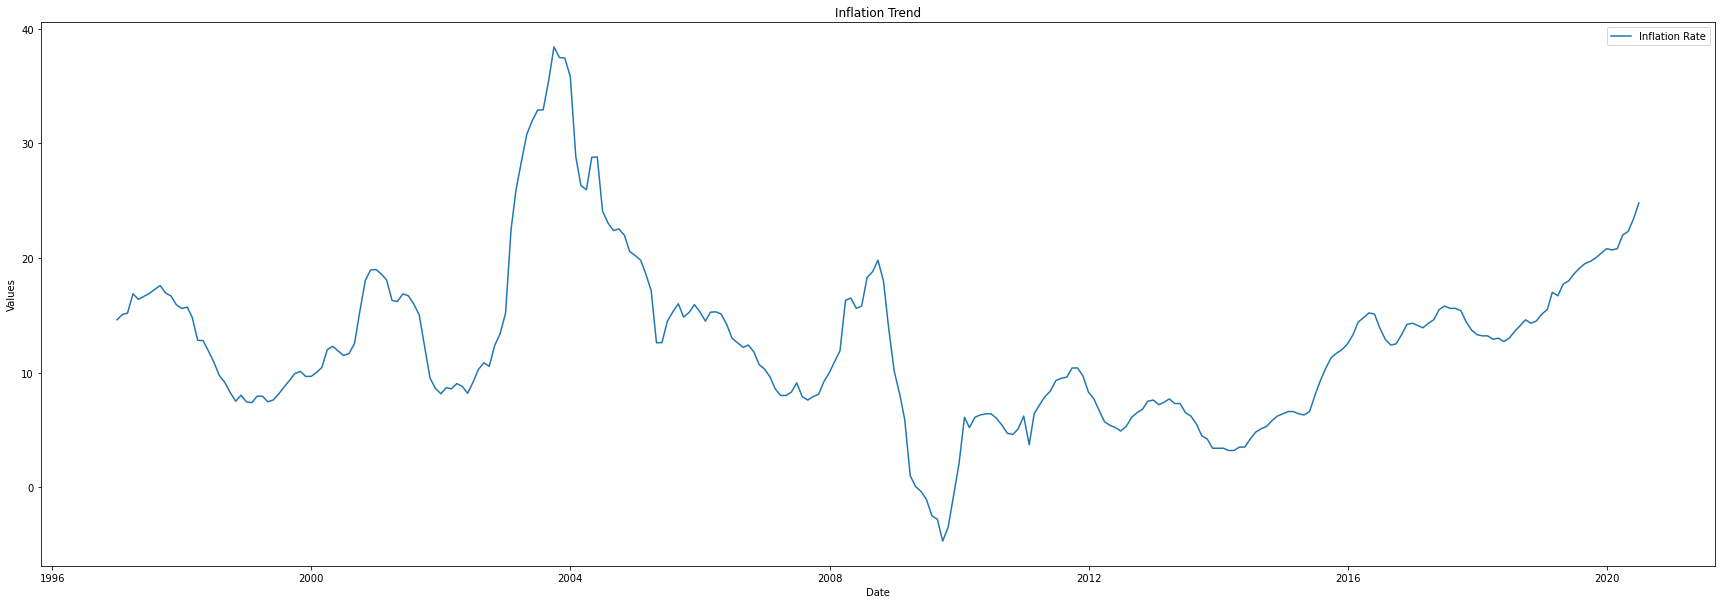

In [48]:
#Visualise Change and inflation Rate
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Inf_Forecast[["InflationRate"]])
#line_chart2 = plt.plot(Inf_Forecast['EXP_HT'])
plt.title('Inflation Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend([ 'Inflation Rate'])
plt.show()

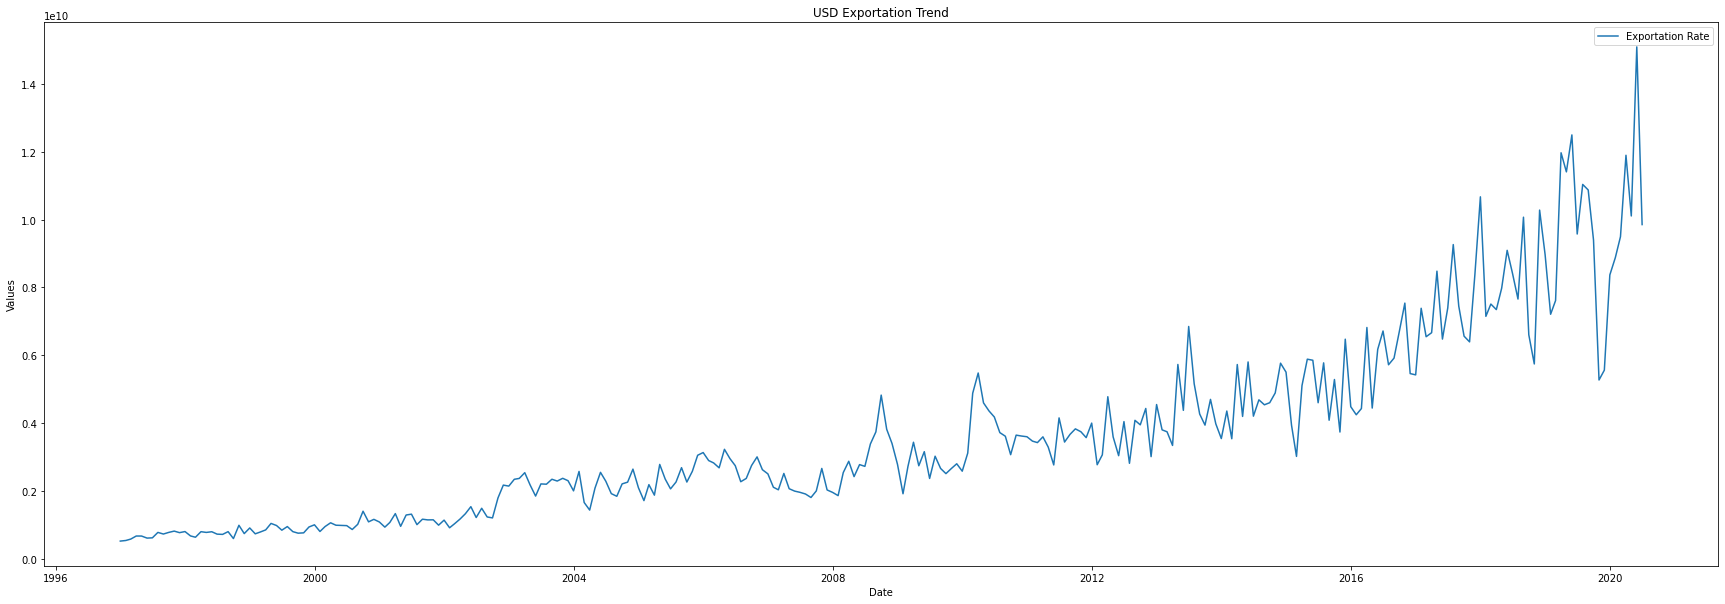

In [49]:
#Visualise Change and inflation Rate
plt.figure(figsize=(30, 10))
#line_chart1 = plt.plot(Inf_Forecast[["InflationRate"]])
line_chart2 = plt.plot(Inf_Forecast['EXP_HT'])
plt.title('USD Exportation Trend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend([ 'Exportation Rate'])
plt.show()

As for the exports, the imports seem to be seized with lows in February. Inflation does not seem to be directly correlated to the level of Haitian imports. 

### III. MULTIVARIATE ANALYSIS <a name="multi-var"></a>

### _III.1.- MULTIVARIATE TIME SERIES ANALYSIS_ <a name="multi-anal"></a>

In the case of time series, the study of linear correlations as described by Pearson is obsolete. Another framework has been provided by Engle, Granger, Johansen, Wold, and other famous econometrist: the hypotheses of causation and cointegration, which accounts for correlation that may occur over time, and lags that induce a non-linear relation between variables. 

### A. Stationarity <a name="stationarity"></a>

A time series is first a mathematical series. To be able to study its properties, it must be converging to some long run stability. This is described as stationarity. Stationarity tests detect whether the series has a unit root, this is to say whether the coefficient of its first lag (as it is regressed on itself) is lesser than one, or not. If it is lesser than one, this means the series tends to converge over time. All other coefficients tend to be lesser than the first root. To evaluate stationarity, we will use **Dickey Fuller**'s sequential tests, starting with the series at level. 

_**Note:** For all that follows, we will use the `Xtrain` dataset because log transformation is recommended in economic series: the coefficients estimated are elasticities! We won't account for the trend. Its presence in the modelization or not is not important to us. `Xtest` for accuracy testing._

###### Let's create Dataframe for Machine Learning Forecasting -Train and Test

In [50]:
Inf_Reset_log

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
1996-12-31,23.411711,2.714218,2.681535,2.965273,19.161617,20.073582
1997-01-31,23.426089,2.788702,2.713014,2.844909,18.732444,20.106762
1997-02-28,23.426759,2.779546,2.720323,2.753661,19.079963,20.181349
1997-03-31,23.459774,2.803700,2.825788,2.727853,19.293359,20.325438
1997-04-30,23.462739,2.814888,2.796350,2.884801,19.427680,20.324265
...,...,...,...,...,...,...
2020-02-29,26.693367,4.547235,3.034953,2.708050,22.740533,22.974348
2020-03-31,26.733366,4.584690,3.091042,2.302585,22.895914,23.199686
2020-04-30,26.781883,4.633124,3.104587,2.302585,21.968493,23.036709


In [51]:
#Create Train number row
Train_Size=int(Inf_Reset_log.shape[0]*0.8)
Train_Size

220

In [52]:
#Create train dataset
train =  Inf_Reset_log[0:Train_Size]
train

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
1996-12-31,23.411711,2.714218,2.681535,2.965273,19.161617,20.073582
1997-01-31,23.426089,2.788702,2.713014,2.844909,18.732444,20.106762
1997-02-28,23.426759,2.779546,2.720323,2.753661,19.079963,20.181349
1997-03-31,23.459774,2.803700,2.825788,2.727853,19.293359,20.325438
1997-04-30,23.462739,2.814888,2.796350,2.884801,19.427680,20.324265
...,...,...,...,...,...,...
2015-06-30,25.989030,3.943263,2.079442,2.302585,22.263900,22.249694
2015-07-31,26.033324,4.011278,2.230014,2.772589,22.331584,22.477199
2015-08-31,26.019110,3.944826,2.341806,2.772589,22.220106,22.130866


In [53]:
#Create Test dataset
Test=Inf_Reset_log[Train_Size:]
Test

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
2015-11-30,26.079869,4.027792,2.484907,2.772589,22.206981,22.591299
2015-12-31,26.100875,4.037721,2.525729,2.772589,22.140357,22.224124
2016-01-31,26.107565,4.085213,2.587764,2.772589,21.808464,22.169590
2016-02-29,26.128492,4.118050,2.667228,2.772589,22.331375,22.211617
2016-03-31,26.133991,4.123300,2.694627,2.772589,22.226427,22.643203
2016-04-30,26.138199,4.126443,2.721295,2.772589,22.264751,22.215021
2016-05-31,26.141116,4.130442,2.714695,2.772589,22.384071,22.543779
2016-06-30,26.147647,4.141449,2.631889,2.639057,22.306320,22.627933
2016-07-31,26.155361,4.153470,2.557227,2.639057,22.378686,22.467546


#### 1.- Dickey Fuller's Stationnarity Test (Level)

In [54]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False, regression='ct'):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='t-stat', regression='ct')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    
          
# ADF Test on each column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "M3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9549
 No. Lags Chosen       = 9
 Critical value 1%     = -4.003
 Critical value 5%     = -3.432
 Critical value 10%    = -3.139
 => P-Value = 0.6258. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ChangeRate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5274
 No. Lags Chosen       = 2
 Critical value 1%     = -4.001
 Critical value 5%     = -3.431
 Critical value 10%    = -3.139
 => P-Value = 0.8196. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "InflationRate" 
    -----------------------------------------------
 Null Hypothesis: Dat

All series are non-stationary at level when the linear-trend model of Dickey is considered, except the last colunms of export. Let's modelize the no-trend model with a constant and see if any becomes stationary:

In [55]:
# ADF Test on each column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name, regression='c')
    print('\n')    

    Augmented Dickey-Fuller Test on "M3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9549
 No. Lags Chosen       = 9
 Critical value 1%     = -4.003
 Critical value 5%     = -3.432
 Critical value 10%    = -3.139
 => P-Value = 0.6258. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ChangeRate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5274
 No. Lags Chosen       = 2
 Critical value 1%     = -4.001
 Critical value 5%     = -3.431
 Critical value 10%    = -3.139
 => P-Value = 0.8196. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "InflationRate" 
    -----------------------------------------------
 Null Hypothesis: Dat

All series are non-stationary at level when the constant model of Dickey is considered except the last columns of export. Let's modelize the no-trend-no-constant model and see if any becomes stationary:

In [56]:
# ADF Test on each column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name, regression='nc')
    print('\n')

    Augmented Dickey-Fuller Test on "M3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9549
 No. Lags Chosen       = 9
 Critical value 1%     = -4.003
 Critical value 5%     = -3.432
 Critical value 10%    = -3.139
 => P-Value = 0.6258. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ChangeRate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5274
 No. Lags Chosen       = 2
 Critical value 1%     = -4.001
 Critical value 5%     = -3.431
 Critical value 10%    = -3.139
 => P-Value = 0.8196. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "InflationRate" 
    -----------------------------------------------
 Null Hypothesis: Dat

All series are non-stationary at level when the no-trend-no-constant model of Dickey is considered. Let's compute the first differences and start over the sequential strategy of tests:

#### 2.- Dickey Fuller's Unit Root (first differences)

In [57]:
#Create lag 1 dataframe
dif1 = train.copy().diff().dropna()
dif1.head()

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
1997-01-31,0.014378,0.074484,0.031479,-0.120364,-0.429173,0.033180
1997-02-28,0.000670,-0.009156,0.007309,-0.091249,0.347519,0.074587
1997-03-31,0.033015,0.024154,0.105465,-0.025808,0.213396,0.144089
1997-04-30,0.002965,0.011188,-0.029438,0.156948,0.134321,-0.001173
1997-05-31,0.011155,0.007503,0.015776,0.038361,0.037535,-0.094547


In [58]:
#Ad Fuller Stationnarity Test
for name, column in dif1.iteritems():
    adfuller_test(column, name=column.name, regression='ct')
    print('\n')

    Augmented Dickey-Fuller Test on "M3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7078
 No. Lags Chosen       = 13
 Critical value 1%     = -4.004
 Critical value 5%     = -3.432
 Critical value 10%    = -3.14
 => P-Value = 0.0219. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ChangeRate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.3709
 No. Lags Chosen       = 0
 Critical value 1%     = -4.001
 Critical value 5%     = -3.431
 Critical value 10%    = -3.139
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "InflationRate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

All series are stationary with a trend and a constant.

#### DataFrame Decomposition

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
These components are defined as follows:

•	Level: The average value in the series.

•	Trend: The increasing or decreasing value in the series.

•	Seasonality: The repeating short-term cycle in the series.

•	Noise: The random variation in the series.
    
Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:

•	Additive: y(t)=Level+Trend+Seasonality+Noisey(t)=Level+Trend+Seasonality+Noise

•	Multiplicative: y(t)=Level∗Trend∗Seasonality∗Noisey(t)=Level∗Trend∗Seasonality∗Noise

In this case we are going to use function seasonal_decompose() from the statsmodels library.

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [ 'M3','ChangeRate','InflationRate','PoliciesRate','IMP_HT','EXP_HT']

for column in core_columns:
    decomp = seasonal_decompose(dif1[column], period=52, model='additive', extrapolate_trend='freq')
    dif1[f"{column}_trend"] = decomp.trend
    dif1[f"{column}_seasonal"] = decomp.seasonal



<ipython-input-60-ddb8f74b7d9d>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(dif1[column], freq=52, model='additive', extrapolate_trend='freq')
<ipython-input-60-ddb8f74b7d9d>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(dif1[column], freq=52, model='additive', extrapolate_trend='freq')
<ipython-input-60-ddb8f74b7d9d>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(dif1[column], freq=52, model='additive', extrapolate_trend='freq')


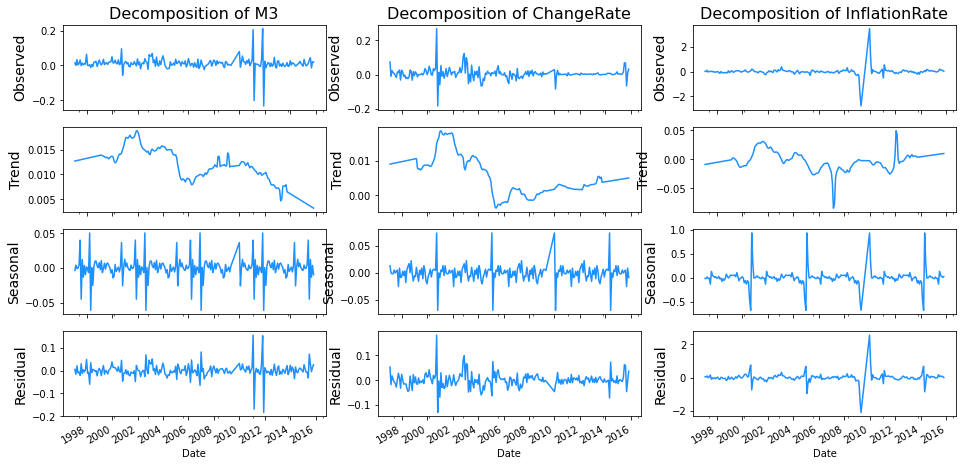

In [60]:
fig, ax = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['M3','ChangeRate','InflationRate']):
    
    res = seasonal_decompose(dif1[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()


<ipython-input-61-8f76a4a9f60f>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(dif1[column], freq=52, model='additive', extrapolate_trend='freq')
<ipython-input-61-8f76a4a9f60f>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(dif1[column], freq=52, model='additive', extrapolate_trend='freq')
<ipython-input-61-8f76a4a9f60f>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(dif1[column], freq=52, model='additive', extrapolate_trend='freq')


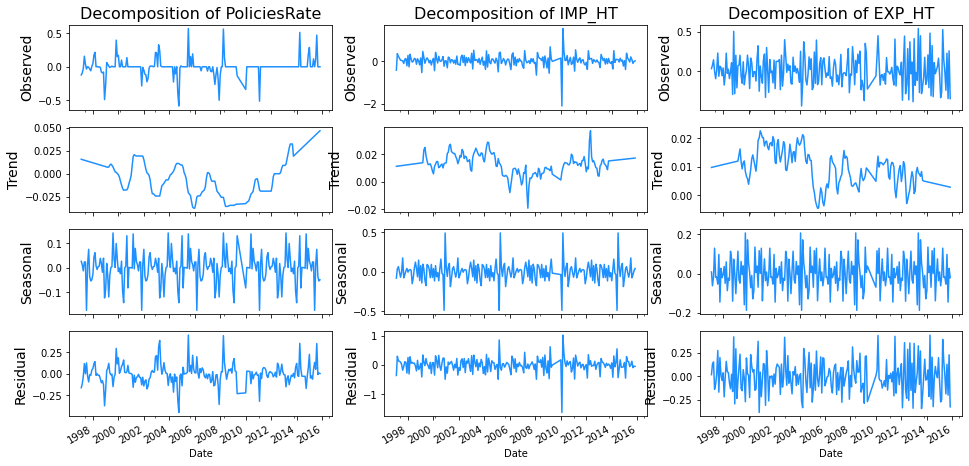

In [61]:
fig, ax = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['PoliciesRate','IMP_HT','EXP_HT']):
    
    res = seasonal_decompose(dif1[column], freq=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()


### B. Long Term Correlations <a name="granger-johansen"></a>

_**Note:** In all that follows, the `logdfg` transformed table will be used._

#### 1. Granger's Pairwise Causality

A time series is often correlated with another series' lags. Granger's pairwise causality tests detect up to which period this correlation stands, or if there is any current correlation at all between both series.

In [62]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=9
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test=test, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df    

In [63]:
#Let's test train dataset on grangers_causation_matrix
grangers_causation_matrix(train, variables = train.columns) 

,M3_x,ChangeRate_x,InflationRate_x,PoliciesRate_x,IMP_HT_x,EXP_HT_x
M3_y,1.0000,0.0142,0.4078,0.1018,0.1110,0.0302
ChangeRate_y,0.5399,1.0000,0.1226,0.1597,0.7166,0.5794
InflationRate_y,0.0797,0.4817,1.0000,0.0174,0.0002,0.0001
PoliciesRate_y,0.0864,0.0059,0.0062,1.0000,0.1845,0.2920
IMP_HT_y,0.0000,0.0000,0.0000,0.0092,1.0000,0.0000
EXP_HT_y,0.0000,0.0000,0.0004,0.0047,0.0000,1.0000


The question is whether the variable x "causes" the variable y or not.

1-We say that the variable x causes the variable y in the sense of Granger if and only if the knowledge of the past of x improves the forecast of y at any horizon.

From this definition follows a corollary:

2-We say that the variable x does not cause the variable y in the Granger sense, if and only if:

E (yt+h/yt, yt-1, ..., y1) = E (yt+h/yt, yt-1, ..., y1, xt, xt-1, .., x1)

Equivalently, we say that the variable y is exogenous in the time series sense.

*Interpretation*

In the light of what is said above, we can see that `The exchange rate` manages to improve the future prediction of the `Inflation rate` by 48.17%. The money supply seems to have only a small effect on the future value of the inflation level.

It also appears that the future `exchange rate` is 71.6% due to `Haitian imports`.

#### 2. Johansen's Cointegration Test

While causality indicates either X is causing Y or either Y is causing X or either of both variables are casuing each other, cointegration tells us whether there exists a long and/or a short term relation among a subset of a set of variables.

In [64]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05, max_lag=3): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,max_lag)
    d = {'0.90':0, '0.95':1, '0.99':3}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('     Name       ::  Test Stat > C(95%)    =>   Signif  \n', '--'*30)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(col.rjust(15), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [65]:
#Cointegration test
cointegration_test(train)

     Name       ::  Test Stat > C(95%)    =>   Signif  
 ------------------------------------------------------------
             M3 ::  158.54    > 83.9383   =>   True
     ChangeRate ::  88.99     > 60.0627   =>   True
  InflationRate ::  45.41     > 40.1749   =>   True
   PoliciesRate ::  21.77     > 24.2761   =>   False
         IMP_HT ::  6.71      > 12.3212   =>   False
         EXP_HT ::  1.6       > 4.1296    =>   False


With 6-3 relations of cointegration, we want to estimate a model using all the variables as are:

### C. Modelling & Forecasting  <a name="model-predict"></a>

##### VAR MODELLING

Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

We need to make one last conversion to make the VAR estimation accurate and understandable to the `statsmodels` package:

In [66]:
train.index = pd.DatetimeIndex(train.index).to_period('M')

In [67]:
#Show dataframe transformation
train

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
1996-12,23.411711,2.714218,2.681535,2.965273,19.161617,20.073582
1997-01,23.426089,2.788702,2.713014,2.844909,18.732444,20.106762
1997-02,23.426759,2.779546,2.720323,2.753661,19.079963,20.181349
1997-03,23.459774,2.803700,2.825788,2.727853,19.293359,20.325438
1997-04,23.462739,2.814888,2.796350,2.884801,19.427680,20.324265
...,...,...,...,...,...,...
2015-06,25.989030,3.943263,2.079442,2.302585,22.263900,22.249694
2015-07,26.033324,4.011278,2.230014,2.772589,22.331584,22.477199
2015-08,26.019110,3.944826,2.341806,2.772589,22.220106,22.130866


#### 1. Fitting the VAR estimation

In [68]:
from statsmodels.tsa.api import VAR

modelVAR = VAR(train)

In [69]:
for i in range(1,5):
    result = modelVAR.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -26.384190455844497
BIC :  -25.73423149396188
FPE :  3.4797531725754837e-12
HQIC:  -26.121691165711262 

Lag Order = 2
AIC :  -27.002171082936727
BIC :  -25.791204959553475
FPE :  1.8770475514176407e-12
HQIC:  -26.51304414687454 

Lag Order = 3
AIC :  -27.049051440207315
BIC :  -25.273437162310483
FPE :  1.7943934921611769e-12
HQIC:  -26.33177678952945 

Lag Order = 4
AIC :  -26.927641337214176
BIC :  -24.58369799854462
FPE :  2.0332427299748963e-12
HQIC:  -25.980682490754774 



In [70]:
modelVAR.select_order(maxlags=4).summary()

,AIC,BIC,FPE,HQIC
0,-13.80,-13.71,1.015e-06,-13.76
1,-26.36,-25.71,3.557e-12,-26.10
2,-26.95,-25.73*,1.971e-12,-26.46*
3,-27.02*,-25.24,1.843e-12*,-26.30
4,-26.93,-24.58,2.033e-12,-25.98


In [71]:
model_fitted = modelVAR.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Sep, 2021
Time:                     12:10:47
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -24.5837
Nobs:                     216.000    HQIC:                  -25.9807
Log likelihood:           1219.24    FPE:                2.03324e-12
AIC:                     -26.9276    Det(Omega_mle):     1.05392e-12
--------------------------------------------------------------------
Results for equation M3
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.780697         0.334502            2.334           0.020
L1.M3                    0.443431         0.076844            5.771           0.000
L1.ChangeRate            0.123351         0.074257 

In [72]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train.columns, out):
    lb = 1.372
    hb = 1.808
    if (val>=0 and val<lb):
        print(col, ':', round(val, 2), ' >>> Positive error autocorrelation')
    elif ((val>=lb and val<hb) or (val>=4-hb and val<4-lb)):
        print(col, ':', round(val, 2), ' >>> Unable to determine autocorrelation type')
    elif (val>=4-lb and val<=4):
        print(col, ':', round(val, 2), ' >>> Negative error autocorrelation')
    else:
        print(col, ':', round(val, 2), ' >>> No autocorrelation')

M3 : 2.02  >>> No autocorrelation
ChangeRate : 2.03  >>> No autocorrelation
InflationRate : 2.11  >>> No autocorrelation
PoliciesRate : 2.0  >>> No autocorrelation
IMP_HT : 2.03  >>> No autocorrelation
EXP_HT : 1.96  >>> No autocorrelation


#### 2. Forecasts & Evaluation

In [73]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train.values[-lag_order:]
forecast_input

4


array([[26.03332409,  4.01127812,  2.2300144 ,  2.77258872, 22.33158437,
        22.47719947],
       [26.01911028,  3.94482634,  2.34180581,  2.77258872, 22.220106  ,
        22.13086598],
       [26.0401257 ,  3.95262161,  2.42480273,  2.77258872, 22.20528081,
        22.38847434],
       [26.05931736,  3.98488923,  2.45958884,  2.77258872, 22.21342707,
        22.04187978]])

In [74]:
# Forecast
nobs = len(Test)
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
inf_forecast = pd.DataFrame(fc, index=Inf_Reset_log.index[-nobs:], columns=Inf_Reset_log.columns)
inf_forecast = inf_forecast[train.columns]
inf_forecast

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
2015-11-30,26.036289,3.968892,2.303077,2.747905,22.254144,22.258988
2015-12-31,26.035419,3.975714,2.294432,2.631938,22.246205,22.221995
2016-01-31,26.029741,3.958774,2.157990,2.546541,22.152585,22.241522
2016-02-29,26.024909,3.958649,2.164731,2.419893,22.111699,22.192489
2016-03-31,26.020288,3.948201,2.137269,2.310404,22.057655,22.209939
2016-04-30,26.015717,3.942686,2.054173,2.198737,22.035118,22.217927
2016-05-31,26.012707,3.936048,1.984680,2.091440,22.045458,22.228834
2016-06-30,26.009882,3.930806,1.952079,1.988537,22.013523,22.231023
2016-07-31,26.007980,3.925004,1.922329,1.894369,21.996798,22.240469


In [75]:
def invert_transform(train, inf_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    inf_fc = inf_forecast.copy()
    columns = train.columns
    for col in columns:        
        # Roll back 2nd Diff
        #if second_diff:
        #    inf_fc[str(col)] = (train[col].iloc[-1]-train[col].iloc[-2]) + inf_fc[str(col)].cumsum()
        # Roll back 1st Diff
        inf_fc[str(col)] = train[col].iloc[-1] + inf_fc[str(col)].cumsum()
        inf_fc.rename(columns={col: col+'_forecast'}, inplace=True)
    return inf_fc

In [76]:
def invert_transform_2(train, inf_forecast, second_diff= False):
    """Revert back the differencing to get the forecast to original scale."""
    inf_fc=inf_forecast.copy()
    columns=train.columns
    for col in columns:
        inf_fc[str(col)]= train[col].iloc[-1]+inf_forecast[str(col)].shift(-1)
        inf_fc.rename(columns={col: col+ "_forecast"}, inplace =True)
    return inf_fc
    
    
#cols = df.columns
#x = []
#for col in cols:
#    diff_results = df[col] + data_diff[col].shift(-1)
#    x.append(diff_results)
#diff_df_inverted = pd.concat(x, axis=1)

#diff_df_inverted

In [77]:
inf_invert = np.exp(invert_transform_2(train[['M3','ChangeRate', 'InflationRate', 'PoliciesRate', 'IMP_HT', 'EXP_HT']], 
                                     inf_forecast[['M3','ChangeRate', 'InflationRate', 'PoliciesRate', "IMP_HT", "EXP_HT"]]))
inf_invert.head()

,M3_forecast,ChangeRate_forecast,InflationRate_forecast,PoliciesRate_forecast,IMP_HT_forecast,EXP_HT_forecast
Date,,,,,,
2015-11-30,4.211691e+22,2865.800578,116.049961,222.410903,2.035039e+19,1.673234e+19
2015-12-31,4.187845e+22,2817.662879,101.248549,204.206183,1.853165e+19,1.706228e+19
2016-01-31,4.167657e+22,2817.310340,101.933448,179.914425,1.778926e+19,1.624585e+19
2016-02-29,4.148445e+22,2788.027880,99.172183,161.255971,1.685336e+19,1.653182e+19
2016-03-31,4.129523e+22,2772.696878,91.264502,144.217937,1.647779e+19,1.666441e+19


In [78]:
inf_test = np.exp(Test.head())
inf_test = inf_test[train.columns]
inf_test

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
Date,,,,,,
2015-11-30,2.120037e+11,56.136800,12.0,16.0,4.409296e+09,6.475550e+09
2015-12-31,2.165040e+11,56.696978,12.5,16.0,4.125106e+09,4.485535e+09
2016-01-31,2.179573e+11,59.454598,13.3,16.0,2.960027e+09,4.247471e+09
2016-02-29,2.225665e+11,61.439300,14.4,16.0,4.993362e+09,4.429787e+09
2016-03-31,2.237939e+11,61.762700,14.8,16.0,4.495879e+09,6.820527e+09


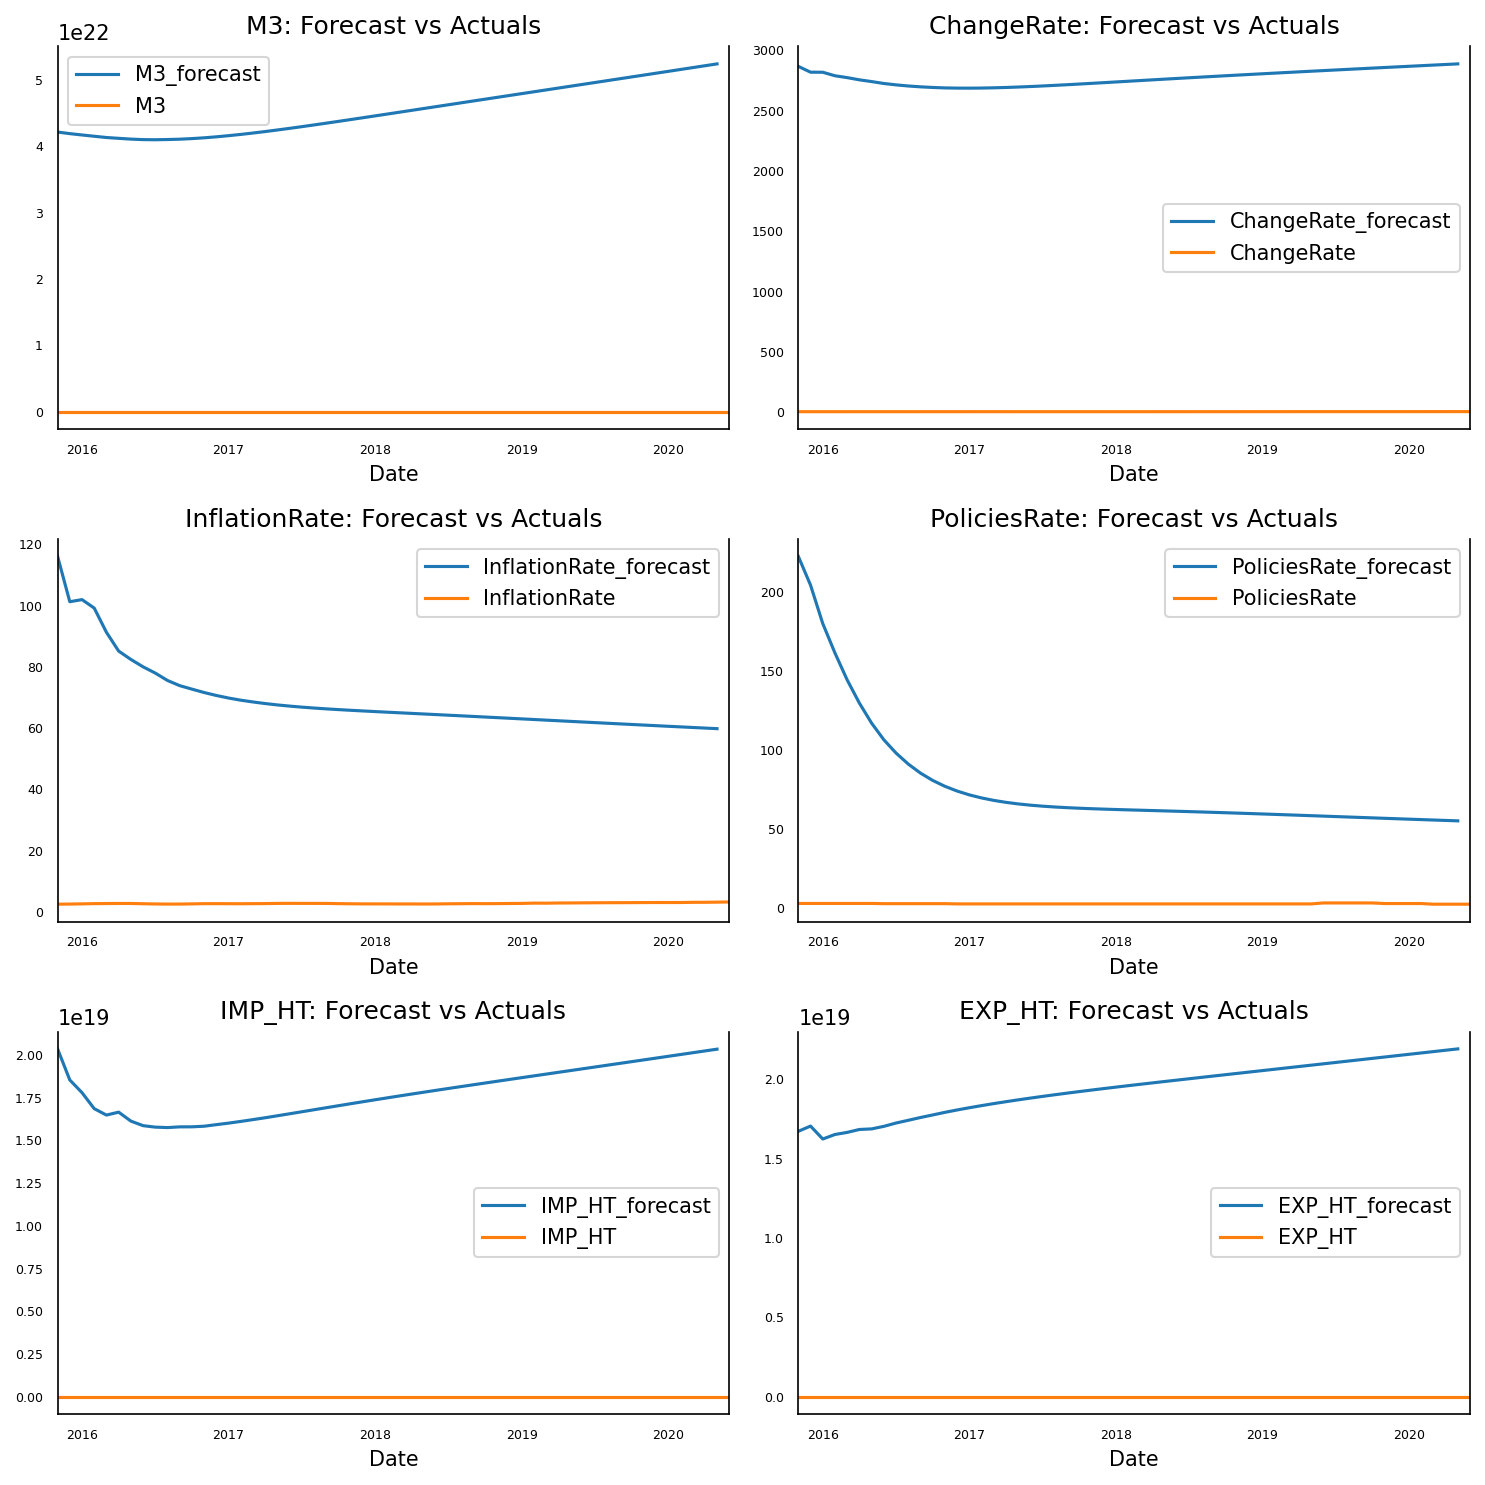

In [79]:
fig, axes = plt.subplots(nrows=int(len(Inf_Reset_log.columns)/2), ncols=2, dpi=150, figsize=(10,10))

for i, (col,ax) in enumerate(zip(Inf_Reset_log.columns, axes.flatten())):
    
    inf_invert[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    Test[col][-nobs:].plot(legend=True, ax=ax);
    
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [80]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

for colname in train.columns:
    print('Forecast Accuracy of: '+ colname)
    accuracy_prod = forecast_accuracy(inf_invert[colname+'_forecast'].values, Test[colname])
    for k, v in accuracy_prod.items():
        print(k.rjust(10), ': ', round(v,4))
    print('\n')

Forecast Accuracy of: M3
      mape :  1.7192109471046618e+21
        me :  4.541829992312678e+22
       mae :  4.541829992312678e+22
       mpe :  1.7192109471046618e+21
      rmse :  4.5568719471078665e+22
      corr :  nan
    minmax :  nan


Forecast Accuracy of: ChangeRate
      mape :  647.1549
        me :  2768.5497
       mae :  2768.5497
       mpe :  647.1549
      rmse :  2769.2659
      corr :  nan
    minmax :  nan


Forecast Accuracy of: InflationRate
      mape :  24.6181
        me :  66.7465
       mae :  66.7465
       mpe :  24.6181
      rmse :  67.8151
      corr :  nan
    minmax :  nan


Forecast Accuracy of: PoliciesRate
      mape :  28.6177
        me :  74.8774
       mae :  74.8774
       mpe :  28.6177
      rmse :  83.6692
      corr :  nan
    minmax :  nan


Forecast Accuracy of: IMP_HT
      mape :  7.940767240004655e+17
        me :  1.7820086009304226e+19
       mae :  1.7820086009304226e+19
       mpe :  7.940767240004655e+17
      rmse :  1.7878955

<ipython-input-80-af158b061a6e>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-80-af158b061a6e>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


Now let's forecast up to December 2021

In [81]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input2 = train.values[-lag_order:]
forecast_input2

4


array([[26.03332409,  4.01127812,  2.2300144 ,  2.77258872, 22.33158437,
        22.47719947],
       [26.01911028,  3.94482634,  2.34180581,  2.77258872, 22.220106  ,
        22.13086598],
       [26.0401257 ,  3.95262161,  2.42480273,  2.77258872, 22.20528081,
        22.38847434],
       [26.05931736,  3.98488923,  2.45958884,  2.77258872, 22.21342707,
        22.04187978]])

In [82]:
# Forecast 
# From June 2020 to December 2021, the number of steps forward to predict is 19 months
num_steps = 19
fc2 = model_fitted.forecast(y=forecast_input2, steps=num_steps)
df_forecast2 = pd.DataFrame(fc2, index=pd.date_range(start='June 2020', periods = num_steps, freq='M'), 
                            columns=train.columns)
df_forecast2.index = pd.DatetimeIndex(df_forecast2.index).to_period('M')

df_forecast2

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
2020-06,26.036289,3.968892,2.303077,2.747905,22.254144,22.258988
2020-07,26.035419,3.975714,2.294432,2.631938,22.246205,22.221995
2020-08,26.029741,3.958774,2.157990,2.546541,22.152585,22.241522
2020-09,26.024909,3.958649,2.164731,2.419893,22.111699,22.192489
2020-10,26.020288,3.948201,2.137269,2.310404,22.057655,22.209939
2020-11,26.015717,3.942686,2.054173,2.198737,22.035118,22.217927
2020-12,26.012707,3.936048,1.984680,2.091440,22.045458,22.228834
2021-01,26.009882,3.930806,1.952079,1.988537,22.013523,22.231023
2021-02,26.007980,3.925004,1.922329,1.894369,21.996798,22.240469
2021-03,26.007543,3.920803,1.896419,1.811839,21.991366,22.252701


In [83]:
first_diff2 = np.exp(invert_transform_2(train[train.columns[:3]], 
                                     df_forecast2[train.columns[:3]]))
first_diff2

,M3_forecast,ChangeRate_forecast,InflationRate_forecast
2020-06,4.211691e+22,2865.800578,116.049961
2020-07,4.187845e+22,2817.662879,101.248549
2020-08,4.167657e+22,2817.310340,101.933448
2020-09,4.148445e+22,2788.027880,99.172183
2020-10,4.129523e+22,2772.696878,91.264502
2020-11,4.117113e+22,2754.352345,85.137567
2020-12,4.105501e+22,2739.951803,82.406772
2021-01,4.097698e+22,2724.098586,79.991280
2021-02,4.095907e+22,2712.679850,77.945304
2021-03,4.099201e+22,2703.349746,75.531459


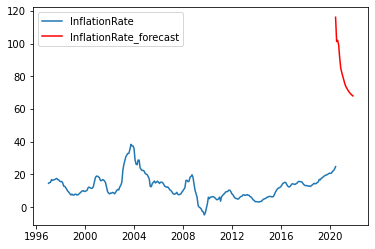

In [84]:
#Visualise inflation columns for VAR model
plt.plot(Inf_Forecast['InflationRate']) #[220:])
plt.plot(first_diff2['InflationRate_forecast'], color='red')
plt.legend(['InflationRate','InflationRate_forecast'])
plt.show()

###### LINEAR REGRESSIVE MODELLING

In [85]:
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [86]:
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
1996-12-31,1.470879e+10,15.0928,14.607501,19.4,2.097899e+08,5.222109e+08
1997-01-31,1.492180e+10,16.2599,15.074644,17.2,1.365832e+08,5.398287e+08
1997-02-28,1.493180e+10,16.1117,15.185226,15.7,1.933404e+08,5.816324e+08
1997-03-31,1.543299e+10,16.5056,16.874242,15.3,2.393312e+08,6.717779e+08
1997-04-30,1.547882e+10,16.6913,16.384732,17.9,2.737373e+08,6.709903e+08
...,...,...,...,...,...,...
2020-02-29,3.915453e+11,94.3711,20.800000,15.0,7.517752e+09,9.498011e+09
2020-03-31,4.075242e+11,97.9728,22.000000,10.0,8.781508e+09,1.189860e+10
2020-04-30,4.277834e+11,102.8348,22.300000,10.0,3.473725e+09,1.010917e+10
2020-05-31,4.476774e+11,108.9426,23.400000,10.0,3.390401e+09,1.509388e+10


In [87]:
#Transform following columns in billion unit
Inf_Forecast['M3']=Inf_Forecast['M3']/(10**9)
Inf_Forecast['IMP_HT']=Inf_Forecast['IMP_HT']/(10**9)
Inf_Forecast['EXP_HT']=Inf_Forecast['EXP_HT']/(10**9)
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
1996-12-31,14.708790,15.0928,14.607501,19.4,0.209790,0.522211
1997-01-31,14.921797,16.2599,15.074644,17.2,0.136583,0.539829
1997-02-28,14.931797,16.1117,15.185226,15.7,0.193340,0.581632
1997-03-31,15.432994,16.5056,16.874242,15.3,0.239331,0.671778
1997-04-30,15.478823,16.6913,16.384732,17.9,0.273737,0.670990
...,...,...,...,...,...,...
2020-02-29,391.545304,94.3711,20.800000,15.0,7.517752,9.498011
2020-03-31,407.524171,97.9728,22.000000,10.0,8.781508,11.898597
2020-04-30,427.783389,102.8348,22.300000,10.0,3.473725,10.109169
2020-05-31,447.677408,108.9426,23.400000,10.0,3.390401,15.093885


In [88]:
#Create Train number row
inf_train_size=int(Inf_Forecast.shape[0]*0.8)
inf_train_size

226

In [89]:
#Create train dataset
inf_mil_train =  Inf_Forecast[0:inf_train_size]
inf_mil_train

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
1996-12-31,14.708790,15.092800,14.607501,19.4,0.209790,0.522211
1997-01-31,14.921797,16.259900,15.074644,17.2,0.136583,0.539829
1997-02-28,14.931797,16.111700,15.185226,15.7,0.193340,0.581632
1997-03-31,15.432994,16.505600,16.874242,15.3,0.239331,0.671778
1997-04-30,15.478823,16.691300,16.384732,17.9,0.273737,0.670990
...,...,...,...,...,...,...
2015-05-31,187.628157,48.111293,6.600000,9.0,3.844830,5.854630
2015-06-30,193.594252,51.586647,8.000000,10.0,4.667547,4.601710
2015-07-31,202.362017,55.217400,9.300000,16.0,4.994406,5.777284
2015-08-31,199.506026,51.667365,10.400000,16.0,4.467550,4.086138


In [90]:
#Create Test dataset
inf_mil_test=Inf_Forecast[Train_Size:]
inf_mil_test

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
2015-04-30,185.431089,47.380100,6.3,9.0,4.019181,5.886177
2015-05-31,187.628157,48.111293,6.6,9.0,3.844830,5.854630
2015-06-30,193.594252,51.586647,8.0,10.0,4.667547,4.601710
2015-07-31,202.362017,55.217400,9.3,16.0,4.994406,5.777284
2015-08-31,199.506026,51.667365,10.4,16.0,4.467550,4.086138
...,...,...,...,...,...,...
2020-02-29,391.545304,94.371100,20.8,15.0,7.517752,9.498011
2020-03-31,407.524171,97.972800,22.0,10.0,8.781508,11.898597
2020-04-30,427.783389,102.834800,22.3,10.0,3.473725,10.109169
2020-05-31,447.677408,108.942600,23.4,10.0,3.390401,15.093885


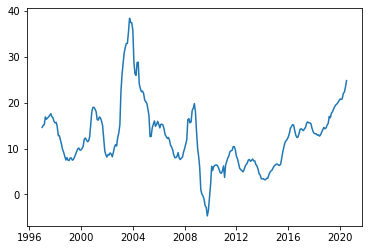

In [91]:
#Visualise inflation columns
plt.plot(Inf_Forecast['InflationRate'])

In [92]:
#Create value for training and forecasting
#Do AdFuller stationnarity Test
X=Inf_Forecast['InflationRate'].values

result=adfuller(X)
print("ADF Statistics: %f" % result[0])
print('p-values: %f' % result [1])
print('Critical Values: ')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho-Time Series is Stationary")
else:
    print("Failed to Reject H0- Time Series is non-Stationary")

ADF Statistics: -1.991684
p-values: 0.290231
Critical Values: 
	1%: -3.455
	5%: -2.872
	10%: -2.573
Failed to Reject H0- Time Series is non-Stationary


This Series is non-stationary . let's try on first difference.

#### 2.- Dickey Fuller's Unit Root (first differences)

In [93]:
#Create lag 1 dataframe
X_dif1 = Inf_Forecast['InflationRate'].copy().diff().dropna()
X_dif1.head()

1997-01-31    0.467143
1997-02-28    0.110583
1997-03-31    1.689016
1997-04-30   -0.489510
1997-05-31    0.260540
Freq: M, Name: InflationRate, dtype: float64

In [94]:
#Do AdFuller stationnarity Test
X_dif11=X_dif1.values

result1=adfuller(X_dif11)
print("ADF Statistics: %f" % result1[0])
print('p-values: %f' % result1 [1])
print('Critical Values: ')
for key , value in result1[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result1[0] < result1[4]['5%']:
    print("Reject Ho-Time Series is Stationary")
else:
    print("Failed to Reject H0- Time Series is non-Stationary")

ADF Statistics: -4.402589
p-values: 0.000294
Critical Values: 
	1%: -3.455
	5%: -2.872
	10%: -2.573
Reject Ho-Time Series is Stationary


Now we can say that the series is stationary in first difference.

#### Auto Regressive Model

Thus, an autoregressive model of order p can be written as:
Yt=c+ϕ1Yt−1+ϕ2Yt−2+⋯+ϕpYt−p+εt


For an AR(1) model:
•	when ϕ1=0, Yt is equivalent to white noise;
•	when ϕ1=1 and c=0, Yt is equivalent to a random walk;
•	when ϕ1=1 and c≠0, Yt is equivalent to a random walk with drift;
•	when ϕ1<0, Yt tends to oscillate around the mean.

We normally restrict autoregressive models to stationary data, in which case some constraints on the values of the parameters are required.

•	For an AR(1) model: −1<ϕ1<1.
•	For an AR(2) model: −1<ϕ2<1, ϕ1+ϕ2<1, ϕ2−ϕ1<1.

When p≥3p, the restrictions are much more complicated. 
R takes care of these restrictions when estimating a model.


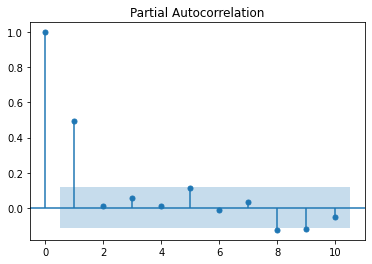

In [95]:
#Plot Stationary Time series Partial Autocorrelation
plot_pacf(X_dif1, lags=10);

In [96]:
#Create Shifted value for Auto Regressive Model
ValAR_Shift=Inf_reset[['Date',"InflationRate"]]
ValAR_Shift['InflationRateShift']=ValAR_Shift['InflationRate'].shift()
ValAR_Shift.head()

<ipython-input-96-8eef1d25b8d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ValAR_Shift['InflationRateShift']=ValAR_Shift['InflationRate'].shift()


,Date,InflationRate,InflationRateShift
0,1996-12-31,14.607501,NaN
1,1997-01-31,15.074644,14.607501
2,1997-02-28,15.185226,15.074644
3,1997-03-31,16.874242,15.185226
4,1997-04-30,16.384732,16.874242


In [97]:
#Set columns Date as index
#ValAR_Shift= ValAR_Shift.set_index('Date') #or use df.set_index('Date', inplace=True) 
ValAR_Shift

,Date,InflationRate,InflationRateShift
0,1996-12-31,14.607501,NaN
1,1997-01-31,15.074644,14.607501
2,1997-02-28,15.185226,15.074644
3,1997-03-31,16.874242,15.185226
4,1997-04-30,16.384732,16.874242
...,...,...,...
278,2020-02-29,20.800000,20.700000
279,2020-03-31,22.000000,20.800000
280,2020-04-30,22.300000,22.000000
281,2020-05-31,23.400000,22.300000


In [98]:
#Drop Time axis
#Drop Na values
#Show ValAR_Shift dataframe
#ValAR_Shift.drop('Date', axis=1, inplace = True)
ValAR_Shift.dropna(inplace=True)
ValAR_Shift


<ipython-input-98-6c5ba4599812>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ValAR_Shift.dropna(inplace=True)


,Date,InflationRate,InflationRateShift
1,1997-01-31,15.074644,14.607501
2,1997-02-28,15.185226,15.074644
3,1997-03-31,16.874242,15.185226
4,1997-04-30,16.384732,16.874242
5,1997-05-31,16.645272,16.384732
...,...,...,...
278,2020-02-29,20.800000,20.700000
279,2020-03-31,22.000000,20.800000
280,2020-04-30,22.300000,22.000000
281,2020-05-31,23.400000,22.300000


In [99]:
#Define Y and X variables
y1=ValAR_Shift.InflationRate.values
X1=ValAR_Shift.InflationRateShift.values

#Define Y and X variables
#y1=Inf_Forecast.ChangeRate
#X1=Inf_Forecast.InflationRate

In [100]:
#Let's found train len
trainAR=int(len(X1)*0.80)

In [101]:
#Let's define Train and Test dataframe
X1_train , X1_test = X1[0:trainAR], X1[trainAR:len(X1)]
y1_train , y1_test = y1[0:trainAR], y1[trainAR:len(X1)]

In [102]:
#Reshape X1 variables
X1_train= X1_train.reshape(-1,1)
X1_test= X1_test.reshape(-1,1)

#Reshape X1 variables
#X1_train= X1_train.values.reshape(-1,1)
#X1_test= X1_test.values.reshape(-1,1)

In [103]:
#Use linearRegression Model
lr = LinearRegression()
lr.fit(X1_train, y1_train)

LinearRegression()

In [104]:
#Found linearRegression coefficient
lr.coef_

array([0.98028164])

In [105]:
#Found LinearRegression Interception Values
lr.intercept_

0.2294888409309035

In [106]:
#Create predict
y1_pred = lr.predict(X1_test)

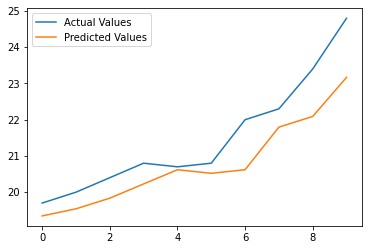

In [107]:
#Show predict and real values
plt.plot(y1_test[-10:], label = "Actual Values")
plt.plot(y1_pred[-10:], label = "Predicted Values")
plt.legend()
plt.show()

In [108]:
#Found accuracy for linearRegression Model
from math import sqrt
rmse = sqrt(mean_squared_error(y1_test, y1_pred))
print("RMSE:" , rmse)

RMSE: 0.6641662613552461


In [109]:
R2 = sklearn.metrics.r2_score(y1_test,y1_pred)
print('R2: {0:.3f} '.format(R2))

R2: 0.955 


**Linear regression Model have a accuracy of 95.5%.**

##### ARIMA MODELLING

An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

ARIMA(1,0,0)
yt = a1yt-1 + ϵt

ARIMA(1,0,1)
yt = a1yt-1 + ϵt + b1ϵt-1

ARIMA(1,1,1)
Δyt = a1Δyt-1 + ϵt + b1ϵt-1 where Δyt = yt - yt-1

In [110]:
#Build ARIMA Model
modelARIMA = ARIMA(y1_train, order=(1,1,0))

C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [111]:
#Create fit variable
model_fit=modelARIMA.fit()

In [112]:
#Print model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  219
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -363.234
Method:                       css-mle   S.D. of innovations              1.270
Date:                Tue, 28 Sep 2021   AIC                            732.468
Time:                        12:10:51   BIC                            742.635
Sample:                             1   HQIC                           736.574
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.162     -0.075      0.940      -0.331       0.306
ar.L1.D.y      0.4739      0.059      8.001      0.000       0.358       0.590
                                    Roots           

C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


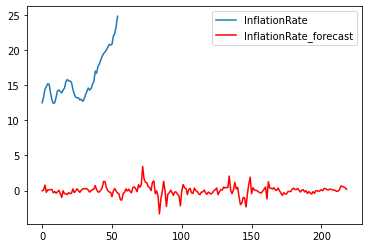

In [113]:
#Show ARIMA Model Prediction for order (1,1,0)

#results_ARIMA= model_fit(disp=-1)
#predict1=modelARIMA.predict(y1_test)
#forecast = modelAUTOARIMA.predict(n_periods=len(y1_test))

model_arima=ARIMA(y1_train, order=(1,1,0))
result_arima=model_arima.fit(disp=-1)
plt.plot(y1_test)
plt.plot(result_arima.fittedvalues, color= "red")
plt.legend(['InflationRate','InflationRate_forecast'])
plt.show()

##### ARIMA AUTO MODELING

In [114]:
!pip install pmdarima
from pmdarima import auto_arima
modelAUTOARIMA = auto_arima(y1_train, trace=True, error_action='ignore', suppress_warnings=True)
modelAUTOARIMA.fit(y1_train)
forecast = modelAUTOARIMA.predict(n_periods=len(y1_test))
forecast 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=737.054, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=786.468, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=732.468, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=737.963, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=784.489, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=734.072, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=733.959, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=728.336, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=736.886, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=735.065, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=735.298, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=726.344, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=731.966, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=732.079, 

array([12.03783966, 12.13299073, 12.1076025 , 12.15324991, 12.12498822,
       12.15354013, 12.13128959, 12.15104042, 12.13465116, 12.14872646,
       12.13685005, 12.1469621 , 12.13839214, 12.14567247, 12.13949524,
       12.14473978, 12.14028852, 12.14406711, 12.14085981, 12.14358231,
       12.14127138, 12.14323298, 12.14156792, 12.14298128, 12.14178157,
       12.14279992, 12.14193551, 12.14266925, 12.14204643, 12.1425751 ,
       12.14212635, 12.14250726, 12.14218393, 12.14245839, 12.14222542,
       12.14242317, 12.14225531, 12.14239779, 12.14227685, 12.14237951,
       12.14229237, 12.14236634, 12.14230355, 12.14235685, 12.14231161,
       12.14235001, 12.14231741, 12.14234508, 12.1423216 , 12.14234153,
       12.14232461, 12.14233897, 12.14232678, 12.14233713, 12.14232835])

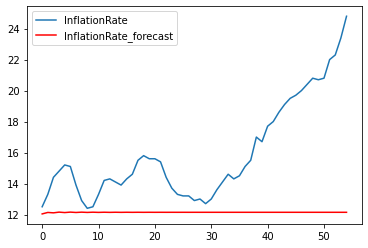

In [115]:
#Display output of auto-arima model
plt.plot(y1_test)
plt.plot(forecast, color= 'red')
plt.legend(['InflationRate','InflationRate_forecast'])
plt.show()

In [116]:
#Print Auto-ARIMA accuracy
rmse = sqrt(mean_squared_error(y1_test, forecast))
print("RMSE:" , rmse)

RMSE: 4.917287615315438


###### AR MODEL

An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.

AR(1) model
Rt = μ + ϕRt-1 + εt

As RHS has only one lagged value(Rt-1)this is called AR model of order 1 where μ is mean and ε is noise at time t
If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.

AR(2) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt

AR(3) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + ϕ3Rt-3 + εt

In [117]:
#Import AR Model
from statsmodels.tsa.ar_model import AR

In [118]:
#Create residual columns
ValAR_Shift['Resid'] = ValAR_Shift['InflationRate'] - ValAR_Shift['InflationRateShift']

<ipython-input-118-f48ab8579c72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ValAR_Shift['Resid'] = ValAR_Shift['InflationRate'] - ValAR_Shift['InflationRateShift']


In [119]:
ValAR_Shift

,Date,InflationRate,InflationRateShift,Resid
1,1997-01-31,15.074644,14.607501,0.467143
2,1997-02-28,15.185226,15.074644,0.110583
3,1997-03-31,16.874242,15.185226,1.689016
4,1997-04-30,16.384732,16.874242,-0.489510
5,1997-05-31,16.645272,16.384732,0.260540
...,...,...,...,...
278,2020-02-29,20.800000,20.700000,0.100000
279,2020-03-31,22.000000,20.800000,1.200000
280,2020-04-30,22.300000,22.000000,0.300000
281,2020-05-31,23.400000,22.300000,1.100000


In [120]:
#Define train ans test dataset
#train1, test1 = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]
#ValAR_Shift
train1, test1 = ValAR_Shift.InflationRate[1:ValAR_Shift.shape[0]-7], ValAR_Shift.InflationRate[ValAR_Shift.shape[0]-7:]

In [121]:
#Build AR Model
modelAR = AR(train1)
model_fitAR = modelAR.fit()

C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\Us

###### No. Of Lags Variables

In [122]:
model_fitAR.k_ar

15

###### Coef Of Lags Variables

In [123]:
model_fitAR.params

const                0.396204
L1.InflationRate     1.526026
L2.InflationRate    -0.576999
L3.InflationRate     0.010837
L4.InflationRate     0.068157
L5.InflationRate     0.053082
L6.InflationRate    -0.187559
L7.InflationRate     0.203342
L8.InflationRate    -0.148469
L9.InflationRate    -0.057131
L10.InflationRate    0.153846
L11.InflationRate   -0.034946
L12.InflationRate   -0.483253
L13.InflationRate    0.753310
L14.InflationRate   -0.275444
L15.InflationRate   -0.035424
dtype: float64

In [124]:
#Create Residual Predictions
predictions3 = model_fitAR.predict(start=len(train1), end=len(train1)+len(test1)-1)

#predictions3 = model_fitAR.forecast(steps=55)[0]
#predictions3 = model_fitAR.predict(start=267, end=273)
#predictions3 = model_fitAR.predict(start=267, end=293)

predictions3

C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


267    20.376705
268    20.190677
269    19.444482
270    19.546071
271    18.990972
272    18.690477
273    18.237602
dtype: float64

In [125]:
#Show test1 values
test1

276    20.8
277    20.7
278    20.8
279    22.0
280    22.3
281    23.4
282    24.8
Name: InflationRate, dtype: float64

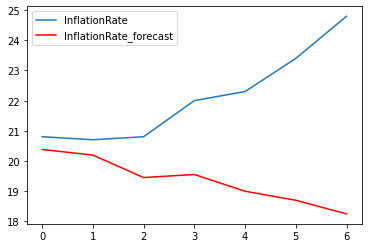

In [126]:
#Display output of AR model
plt.plot(test1.values)
plt.plot(predictions3.values, color= 'red')
plt.legend(['InflationRate','InflationRate_forecast'])
plt.show()

In [127]:
#Calculate rmse
from math import sqrt
rmse = sqrt(mean_squared_error(test1.values, predictions3.values))
print("RMSE:" , rmse)

RMSE: 3.47423419867331


###### SARIMAX MODELLING

Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. Intuitively, ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA). The former views the value at one time just as a weighted sum of past values. The latter model that same value also as a weighted sum but of past residuals (confer. time series decomposition). There is also an integrated term (I) to difference the time series.

In [128]:
import statsmodels.api as sm
model_sar=sm.tsa.statespace.SARIMAX(ValAR_Shift['InflationRate'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results_sar=model_sar.fit()

C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-129-da34900530ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ValAR_Shift['forecast']=results_sar.predict(start=267,end=310,dynamic=True)


<AxesSubplot:>

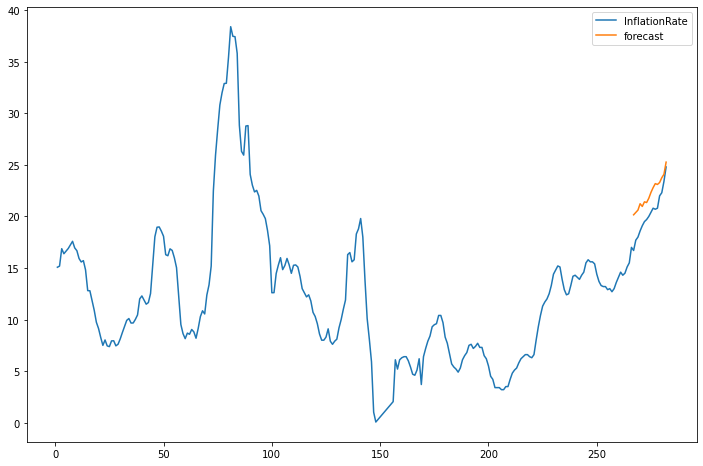

In [129]:
#Visualize predict
ValAR_Shift['forecast']=results_sar.predict(start=267,end=310,dynamic=True)
ValAR_Shift[['InflationRate','forecast']].plot(figsize=(12,8))

In [130]:
#Test mse
forecast1=ValAR_Shift['forecast'].values

rmse = sqrt(mean_squared_error(test1.values,forecast1[267:274]))
print("RMSE:" , rmse)

RMSE: 1.4752825485148995


###### SARIMAX AUTOMODELLING

In [131]:
#Use auto_arima packages too fit p,d,q, and seasonnal order for sarimax model
model_sar_auto = auto_arima(Inf_Forecast['InflationRate'], start_p=1, start_q=1,max_p=5, max_q=5, m=25,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True,)
model_sar_auto.fit(inf_mil_train['InflationRate'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[25]             : AIC=inf, Time=1.99 sec
 ARIMA(0,1,0)(0,1,0)[25]             : AIC=1096.781, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[25]             : AIC=946.229, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[25]             : AIC=inf, Time=1.84 sec
 ARIMA(1,1,0)(0,1,0)[25]             : AIC=1016.884, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[25]             : AIC=912.561, Time=0.73 sec
 ARIMA(1,1,0)(2,1,1)[25]             : AIC=inf, Time=5.77 sec
 ARIMA(1,1,0)(1,1,1)[25]             : AIC=inf, Time=2.33 sec
 ARIMA(0,1,0)(2,1,0)[25]             : AIC=995.346, Time=0.47 sec
 ARIMA(2,1,0)(2,1,0)[25]             : AIC=914.416, Time=1.01 sec
 ARIMA(1,1,1)(2,1,0)[25]             : AIC=914.380, Time=1.20 sec
 ARIMA(0,1,1)(2,1,0)[25]             : AIC=929.508, Time=0.81 sec
 ARIMA(2,1,1)(2,1,0)[25]             : AIC=915.500, Time=3.77 sec
 ARIMA(1,1,0)(2,1,0)[25] intercept   : AIC=914.479, Time=1.71 sec

Best model:  ARIMA(1,1,0)(2,1,0)[25]          

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 25),
      suppress_warnings=True, with_intercept=False)

In [132]:
#Lets train SARIMAX model with recommended parameter
import statsmodels.api as sm
mod_sar_auto = sm.tsa.statespace.SARIMAX(inf_mil_train['InflationRate'], trend='n', order=(1, 1, 0),seasonal_order=(2, 1, 0, 25),enforce_invertibility=False)
results_sar_auto = mod_sar_auto.fit()

In [133]:
#Let's make prediction
forecast_sar_auto = results_sar_auto.predict(n_periods=len(Inf_Forecast))

In [134]:
forecast_sar_auto

1996-12-31     0.000000
1997-01-31    14.607520
1997-02-28    15.074655
1997-03-31    15.185233
1997-04-30    16.874250
                ...    
2015-05-31     5.449659
2015-06-30     5.537130
2015-07-31     9.141968
2015-08-31    10.254703
2015-09-30    10.563240
Freq: M, Name: predicted_mean, Length: 226, dtype: float64

In [135]:
#Inf_Forecast['forecast_sar_auto']=results_sar_auto.predict(start=len(inf_mil_train),end=len(Inf_Forecast),dynamic=True)
#Inf_Forecast[['InflationRate','forecast_sar_auto']].plot(figsize=(12,8))

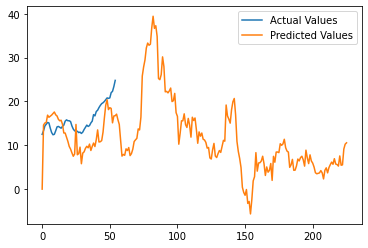

In [136]:
#Show predict and real values
plt.plot(y1_test, label = "Actual Values")
plt.plot(forecast_sar_auto.values, label = "Predicted Values")
plt.legend()
plt.show()

In [137]:
#Test mse
#forecast1=ValAR_Shift['forecast'].values

rmse = sqrt(mean_squared_error(inf_mil_test['InflationRate'].values,forecast_sar_auto[163:]))
print("RMSE:" , rmse)

RMSE: 9.692625560733962


###### MULTIPE LINEAR REGRESSION with IMPORT-EXPORT

In [138]:
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
1996-12-31,14.708790,15.0928,14.607501,19.4,0.209790,0.522211
1997-01-31,14.921797,16.2599,15.074644,17.2,0.136583,0.539829
1997-02-28,14.931797,16.1117,15.185226,15.7,0.193340,0.581632
1997-03-31,15.432994,16.5056,16.874242,15.3,0.239331,0.671778
1997-04-30,15.478823,16.6913,16.384732,17.9,0.273737,0.670990
...,...,...,...,...,...,...
2020-02-29,391.545304,94.3711,20.800000,15.0,7.517752,9.498011
2020-03-31,407.524171,97.9728,22.000000,10.0,8.781508,11.898597
2020-04-30,427.783389,102.8348,22.300000,10.0,3.473725,10.109169
2020-05-31,447.677408,108.9426,23.400000,10.0,3.390401,15.093885


In [139]:
X=Inf_Forecast[Inf_Forecast.columns.difference(['InflationRate', 'forecast_sar_auto'])]
Y=Inf_Forecast.InflationRate

In [140]:
ml_xtrain=X[:int(len(X)*0.8)]
ml_xtest=X[len(ml_xtrain):]
ml_ytrain=Y[:int(len(Y)*0.8)]
ml_ytest=Y[len(ml_ytrain):]

In [141]:
ml_model=LinearRegression()

In [142]:
ml_model_fit=ml_model.fit(ml_xtrain, ml_ytrain)

In [143]:
#Found MultilinearRegression coefficient
ml_model.coef_

array([ 0.48388838,  0.92208303, -0.94773787, -0.09105335,  0.51297821])

In [144]:
#Found MultiLinearRegression Interception Values
ml_model.intercept_

-4.961433083050418

In [145]:
ml_predict=ml_model_fit.predict(ml_xtest)

In [146]:
print(ml_predict)

[ 9.59953074 12.89865636 11.19433259 13.28105822 12.06278758 14.78346603
 12.43465673 13.52924221 13.57502306 12.51889779 12.20750417 13.22773105
 14.52361751 13.02388144 11.36220536 13.3084699  11.64707782 11.27026203
 10.38667012  8.70864433  9.43714498 11.07769339  8.83848503  8.84482328
  7.80606478  9.88917455 11.91831425  9.50237307  8.4807228   8.12878019
  8.90047112 10.05168955  9.26296273  8.24835138 10.24328086  7.69490964
  6.19390179 12.79459012 10.11868812 11.40319258 11.77408839 12.64777198
 12.84429321 15.63079023 20.43105969 17.72585776 20.24520541 18.46695284
 14.10298496 11.89608059 12.55286449 15.71730427 14.37990255 13.11873409
 17.00711474 22.82648226 15.3985621 ]


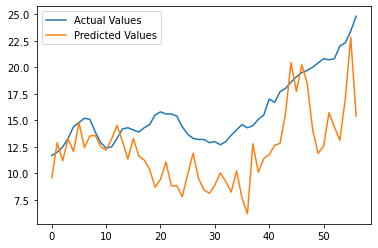

In [147]:
#Show predict and real values
plt.plot(ml_ytest.values, label = "Actual Values")
plt.plot(ml_predict, label = "Predicted Values")
plt.legend()
plt.show()

In [148]:
rmse = mean_squared_error(ml_ytest, ml_predict)
print("RMSE:" , rmse)

RMSE: 19.965337993934067


###### MULTILINEAR REGRESSION WITHOUT EXPORT-IMPORT

In [149]:
X_w=Inf_Forecast[Inf_Forecast.columns.difference(['InflationRate', 'forecast_sar_auto', 'IMP_HT', 'EXP-HT'])]
Y_w=Inf_Forecast.InflationRate

In [150]:
ml_xtrain_w=X_w[:int(len(X)*0.8)]
ml_xtest_w=X_w[len(ml_xtrain):]
ml_ytrain_w=Y_w[:int(len(Y)*0.8)]
ml_ytest_w=Y_w[len(ml_ytrain):]

In [151]:
ml_model_w=LinearRegression()

In [152]:
ml_model_fit_w=ml_model_w.fit(ml_xtrain_w, ml_ytrain_w)

In [153]:
#Found MultilinearRegression_w coefficient
ml_model_w.coef_

array([ 0.47918927,  0.84749267, -0.10819381,  0.49948788])

In [154]:
#Found MultiLinearRegression Interception Values
ml_model_w.intercept_

-4.532609133606206

In [155]:
ml_predict_w=ml_model_fit_w.predict(ml_xtest_w)

In [156]:
print(ml_predict_w)

[ 9.92691948 12.90984412 11.00484931 11.96727422 12.57414175 14.62245438
 12.60022001 14.11441743 13.74502772 13.07583306 13.28546234 13.77771038
 14.35859823 12.38484914 10.48953368 12.01812544 11.37135272 11.39159302
 10.20211152  8.22874166  8.74267628 10.23964393  8.93276077  7.91576024
  7.65944285  9.42317866 10.47957473  7.4724797   7.44716236  7.28288607
  8.54175201  9.63985466  8.7376822   8.3362838  10.57788688  7.24092513
  7.62116369 11.71655221 10.03821757  9.96824618 10.34772973 13.87926728
 14.25351553 17.17641174 19.8997393  21.46021522 21.07682646 18.30875891
 14.54382608 11.46292474 12.39980983 13.32713766 13.86804262 13.40216377
 12.02353229 17.02242515 12.66931237]


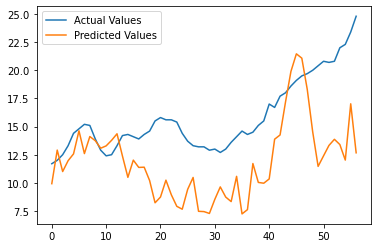

In [157]:
#Show predict and real values
plt.plot(ml_ytest_w.values, label = "Actual Values")
plt.plot(ml_predict_w, label = "Predicted Values")
plt.legend()
plt.show()

In [158]:
rmse = mean_squared_error(ml_ytest_w, ml_predict_w)
print("RMSE:" , rmse)

RMSE: 25.556032463790793


###### ADL MODELLING

An ADL(p ,q ) model assumes that a time series Yt can be represented by a linear function of p of its lagged values and q lags of another time series Xt : Yt=β0+β1Yt−1+β2Yt−2+⋯+βpYt−p+δ1Xt−1+δ2Xt−2+⋯+δqXt−qXt−q+ut.

In [159]:
#Import the required modules for TimeSeries data generation:
import statsmodels.api as sm
#Import the required modules for test statistic calculation:
import statsmodels.stats as sm_stat
#Import the required modules for model estimation:
import statsmodels.tsa as smt
#Import the required modules for optimization:
import scipy.optimize as optimize

#We also need additional data:
import statsmodels.formula.api as smf

In [160]:
def lag(x, n):
    if n == 0:
        return x
    if isinstance(x, pd.Series):
        return x.shift(n) 
    else:
        x = pd.Series(x)
        return x.shift(n) 

    x = x.copy()
    x[n:] = x[0:-n]
    x[:n] = np.nan
    return x

In [161]:
#Transform following columns in billion unit
#Inf_Forecast['M3']=Inf_Forecast['M3']*(10**9)
#Inf_Forecast['IMP_HT']=Inf_Forecast['IMP_HT']*(10**9)
#Inf_Forecast['EXP_HT']=Inf_Forecast['EXP_HT']*(10**9)
#Inf_Forecast

In [162]:
#Create dataframe in neperian logarithm scale
Inf_Forecast_log=np.log(Inf_Forecast[["M3",'EXP_HT',"IMP_HT"]])
Inf_Forecast_log

,M3,EXP_HT,IMP_HT
1996-12-31,2.688445,-0.649684,-1.561649
1997-01-31,2.702823,-0.616503,-1.990822
1997-02-28,2.703493,-0.541917,-1.643303
1997-03-31,2.736508,-0.397827,-1.429907
1997-04-30,2.739473,-0.399001,-1.295586
...,...,...,...
2020-02-29,5.970101,2.251082,2.017267
2020-03-31,6.010100,2.476421,2.172648
2020-04-30,6.058617,2.313443,1.245227
2020-05-31,6.104073,2.714290,1.220948


In [163]:
#add change log in dataset
ChangeRate = Inf_Forecast['ChangeRate']
PoliciesRate=Inf_Forecast['PoliciesRate']
InflationRate=Inf_Forecast['InflationRate']
M3=Inf_Forecast_log['M3']
EXP_HT=Inf_Forecast_log['EXP_HT']
IMP_HT=Inf_Forecast_log['IMP_HT']
Inf_Forecast_log = pd.concat([M3,ChangeRate, PoliciesRate, InflationRate, IMP_HT, EXP_HT], axis=1)
Inf_Forecast_log

##Create definitive dataset
#Inf_Forecast = pd.concat([agregat1, TxDirecteur, Import_Export], axis=1)
#Inf_Forecast

,M3,ChangeRate,PoliciesRate,InflationRate,IMP_HT,EXP_HT
1996-12-31,2.688445,15.0928,19.4,14.607501,-1.561649,-0.649684
1997-01-31,2.702823,16.2599,17.2,15.074644,-1.990822,-0.616503
1997-02-28,2.703493,16.1117,15.7,15.185226,-1.643303,-0.541917
1997-03-31,2.736508,16.5056,15.3,16.874242,-1.429907,-0.397827
1997-04-30,2.739473,16.6913,17.9,16.384732,-1.295586,-0.399001
...,...,...,...,...,...,...
2020-02-29,5.970101,94.3711,15.0,20.800000,2.017267,2.251082
2020-03-31,6.010100,97.9728,10.0,22.000000,2.172648,2.476421
2020-04-30,6.058617,102.8348,10.0,22.300000,1.245227,2.313443
2020-05-31,6.104073,108.9426,10.0,23.400000,1.220948,2.714290


In [164]:
X = Inf_Forecast[["PoliciesRate" , "M3" , "ChangeRate", "IMP_HT" ]]  #"EXP_HT","IMP_HT",'PoliciesRate' , "M3"
y = Inf_Forecast['InflationRate']
## fit a OLS model
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          InflationRate   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     109.7
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           5.59e-56
Time:                        12:11:21   Log-Likelihood:                -824.17
No. Observations:                 283   AIC:                             1658.
Df Residuals:                     278   BIC:                             1677.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.0451      1.060     -5.701      0.000      -8.133      -3.958
PoliciesRate     0.5628      0.039     14.495      0.000       0.486       0.639
M3              -0.0539      0.011     -4.809      0.000      -0.076      -0.032
ChangeRate       0.4785      0.048      9.988      0.000       0.384       0.573
IMP_HT          -0.9359      0.367     -2.550      0.011      -1.658      -0.214
==============================================================================
Omnibus:                        3.242   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                3.655
Skew:                           0.046   Prob(JB):                        0.161
Kurtosis:                       3.549   Cond. No.                         674.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
#Print parameters and pvalues 
print(np.round(est.params, 4))
print(np.round(est.pvalues, 4))

const          -6.0451
PoliciesRate    0.5628
M3             -0.0539
ChangeRate      0.4785
IMP_HT         -0.9359
dtype: float64
const           0.0000
PoliciesRate    0.0000
M3              0.0000
ChangeRate      0.0000
IMP_HT          0.0113
dtype: float64


The p-value for the independent variables indicates that these values are significant for the model because their p-value <= 0.05.

The IMP_HT column represents US imports into Haiti, in other words, Haitian exports to the US. The EXP_HT column represents the US exports to Haiti, in other words the Haitian imports from the US.
The columns M3, IMP_HT, EXP_HT are in billions of gourdes.


In a normal report, we can say that the year-on-year inflation rate can be given by the following formula or equation:

InflationRate= -6.0451 - 0.0539*M3 + 0.4632*ChangeRate + 0.5672*PoliciesRate -0.9359*IMP_HT


This equation can be interpreted as follows: 
*An increase of 1 point of inflation is 67% caused by the impact of the combination of 6% of the money supply, 46% of the exchange rate, 56% of the key rate, 54% of Haitian imports.* ceteris paribus.

Note also that the ADL model developed only manages to capture about 67% of the fluctuations in the inflation rate, which implies that about 37% of the fluctuations in the inflation rate is caused by variables external to the ADL model and not quantified mathematically.

In [166]:
#Inflation Forecasting with OLS Model
Inflation_prediction = est.predict(X)
print(Inflation_prediction)

1996-12-31    11.103905
1997-01-31    10.481279
1997-02-28     9.512579
1997-03-31     9.405864
1997-04-30    10.923207
                ...    
2020-02-29    19.391938
2020-03-31    16.256732
2020-04-30    22.457686
2020-05-31    24.384859
2020-06-30    22.490117
Freq: M, Length: 283, dtype: float64


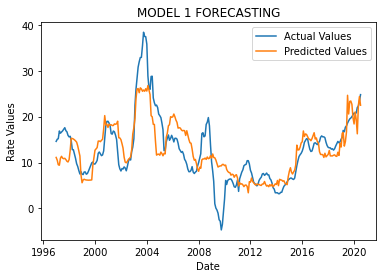

In [167]:
#Show predict and real values
plt.plot(Inf_Forecast['InflationRate'], label = "Actual Values")
plt.plot(Inflation_prediction, label = "Predicted Values")
plt.legend()
plt.title("MODEL 1 FORECASTING")
plt.xlabel('Date')
plt.ylabel('Rate Values')
plt.show()

*We will perform tests to ensure the validity of the model.
Among these tests we will proceed to :

- *tests of individual significance, 

- *tests of global significance, 

- *test of specification, 

- *test of normality of error, 

- *Multicolinearite Test,

- *test of hommocedasticity, 

- *test of heterocedasticity, 

- *test of stability of parameters.

#### Test of global significance

The Fisher test allows us to determine whether all the explanatory variables taken together (with the exception of the constant) can explain the variations in the dependent variable, in this case the inflation rate: y.

The idea of this test is to compare the quality of the model without explanatory variables, i.e. with only the constant, and the model with the explanatory variables and the constant.

In [168]:
#Estimate Fisher Test for OLS Model
est.f_test(X.values)

C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 283, but rank is 5
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[532.99915844]]), p=3.917676081301799e-140, df_denom=278, df_num=5>

Based on Fisher's table, the intersection of v1(degree of freedom of numerator)=6 and v2(degree of freedom of denominator)=277 is 2.14. The value of F-Stat for our OLS Model is 89.09 > the critical value of 2.06. We can deduce the overall significance of the independent variables of the system.

##### Test of normality of error (Jacque Bera)
The Jarque-Bera 23 normality test is also based on the skewness and kurtosis coefficients. It evaluates the simultaneous deviations of these coefficients from the reference values of the normal distribution.

If we look at our skewness = *3.40*, our kurtosis = *0.052*, our JarqueBera pvalue = *0.269*, we can deduce that the data follow a normal distribution.

##### Multicolinearite Test (VIF)

Strictly speaking, perfect multicollinearity exists when one of the explanatory variables of a model is a linear combination of one or more other explanatory variables introduced in the same model. The absence of perfect multicollinearity is one of the conditions required to estimate a linear model and, by extension, a generalized linear model (including logistic regression models).

In reality, perfect multicollinearity is almost never observed. But a strong multicollinearity between several variables can be a problem in the estimation and interpretation of a model.

In [169]:
#Import packages
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
#Determine Independant variable
X_variables = Inf_Forecast[['PoliciesRate' ,"ChangeRate", "IMP_HT" , "M3"]]

In [171]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [172]:
vif_data

,feature,VIF
0,PoliciesRate,4.374120
1,ChangeRate,31.270774
2,IMP_HT,19.083564
3,M3,38.633658


##### Test of hommocedasticity/heteroscedasticity

The assumption of homoscedasticity (meaning “same variance”) is central to linear regression models.  Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables.  Heteroscedasticity (the violation of homoscedasticity) is present when the size of the error term differs across values of an independent variable.  The impact of violating the assumption of homoscedasticity is a matter of degree, increasing as heteroscedasticity increases.

In [173]:
#Import Packages
from statsmodels.stats.diagnostic import het_white

In [174]:
#Perform hommocedasticity test
white_test = het_white(est.resid,  est.model.exog)
white_test

(62.91662415745774,
 3.590437093067457e-08,
 5.472489430636206,
 3.108038995343758e-09)

In [175]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 62.91662415745774, 'LM-Test p-value': 3.590437093067457e-08, 'F-Statistic': 5.472489430636206, 'F-Test p-value': 3.108038995343758e-09}


Original Models is not Hommocedastic.

##### Test of stability of parameters

The chow test is the standard test, it proposes to test the stability of the model for a fixed date, known a priori. On the other hand, stability tests based on recursive residuals try to detect the presence of a break date.

In [176]:
((est.resid)**2).sum()

5608.987721256226

In [177]:
!pip install chowtest
from chow_test import chowtest

Before proceeding to the use of the ChowTest pacakges, I must proceed to some manipulations of the dataframe:

- Division of the dataframe in two parts.
- Construction of 1 model on each part.
- Square summation of the residues of each model.
- Proceed to Chow test
- P-Value test
- Interpretation.

I decide to slice the dataframe Inf_Forecast in 3 part.

- Inf1, where we have data from December 1996 to Aout 2003.

- Inf2, where we have data from september 2003 to september 2009.

- Inf3, where we have date from october 2009 to june 2020

In [178]:
Inf_Forecast

,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
1996-12-31,14.708790,15.0928,14.607501,19.4,0.209790,0.522211
1997-01-31,14.921797,16.2599,15.074644,17.2,0.136583,0.539829
1997-02-28,14.931797,16.1117,15.185226,15.7,0.193340,0.581632
1997-03-31,15.432994,16.5056,16.874242,15.3,0.239331,0.671778
1997-04-30,15.478823,16.6913,16.384732,17.9,0.273737,0.670990
...,...,...,...,...,...,...
2020-02-29,391.545304,94.3711,20.800000,15.0,7.517752,9.498011
2020-03-31,407.524171,97.9728,22.000000,10.0,8.781508,11.898597
2020-04-30,427.783389,102.8348,22.300000,10.0,3.473725,10.109169
2020-05-31,447.677408,108.9426,23.400000,10.0,3.390401,15.093885


In [179]:
#reset dataframe before slicing
Inf_Forecast_ri=Inf_Forecast.reset_index()
Inf_Forecast_ri

,index,M3,ChangeRate,InflationRate,PoliciesRate,IMP_HT,EXP_HT
0,1996-12-31,14.708790,15.0928,14.607501,19.4,0.209790,0.522211
1,1997-01-31,14.921797,16.2599,15.074644,17.2,0.136583,0.539829
2,1997-02-28,14.931797,16.1117,15.185226,15.7,0.193340,0.581632
3,1997-03-31,15.432994,16.5056,16.874242,15.3,0.239331,0.671778
4,1997-04-30,15.478823,16.6913,16.384732,17.9,0.273737,0.670990
...,...,...,...,...,...,...,...
278,2020-02-29,391.545304,94.3711,20.800000,15.0,7.517752,9.498011
279,2020-03-31,407.524171,97.9728,22.000000,10.0,8.781508,11.898597
280,2020-04-30,427.783389,102.8348,22.300000,10.0,3.473725,10.109169
281,2020-05-31,447.677408,108.9426,23.400000,10.0,3.390401,15.093885


In [180]:
#Found number index for slicing
print(Inf_Forecast_ri[Inf_Forecast_ri['index']=='2003-08-31'].index.values)
print(Inf_Forecast_ri[Inf_Forecast_ri['index'] == '2009-10-31'].index.values)

[80]
[154]


In [181]:
#Slice Original Dataframe around break event date
#Inf1 is data form Dec1996 to august 2003
#Inf2 is data from september 2003 to June 2020
#Inf3 is data from Dec1996 to October 2009
#Inf4 is data from Oct 2009 to June 2020 
Inf1=Inf_Forecast_ri.iloc[ :80, :]
print(Inf1)
Inf2=Inf_Forecast_ri.iloc[80: , : ]
print(Inf2)
Inf3=Inf_Forecast_ri.iloc[ : 154 , : ]
print(Inf3)
Inf4=Inf_Forecast_ri.iloc[ 154 :  , : ]
print(Inf4)


        index         M3  ChangeRate  InflationRate  PoliciesRate    IMP_HT  \
0  1996-12-31  14.708790     15.0928      14.607501         19.40  0.209790   
1  1997-01-31  14.921797     16.2599      15.074644         17.20  0.136583   
2  1997-02-28  14.931797     16.1117      15.185226         15.70  0.193340   
3  1997-03-31  15.432994     16.5056      16.874242         15.30  0.239331   
4  1997-04-30  15.478823     16.6913      16.384732         17.90  0.273737   
..        ...        ...         ...            ...           ...       ...   
75 2003-03-31  47.007029     42.2152      28.459938         27.50  1.141352   
76 2003-04-30  48.508950     42.3014      30.803803         27.83  1.189856   
77 2003-05-31  48.270040     40.5400      31.985547         27.83  1.273272   
78 2003-06-30  50.662332     42.8573      32.889799         27.83  1.185750   
79 2003-07-31  50.878104     42.7099      32.916737         27.83  1.340611   

      EXP_HT  
0   0.522211  
1   0.539829  
2   0.

In [182]:
#setindex for previous created dataframe Inf1 and , Inf2
Inf1.set_index("index", inplace= True)
Inf2.set_index('index', inplace=True)
Inf3.set_index('index', inplace= True)
Inf4.set_index('index', inplace= True)

In [183]:
#Create Variables for new model training named est1
X1 = Inf1[["PoliciesRate" , "ChangeRate" , "M3" , "IMP_HT" ]]  #"EXP_HT","IMP_HT",'PoliciesRate' , "M3"
y1 = Inf1['InflationRate']
## fit a OLS model with intercept on TV and Radio
X1 = sm.add_constant(X1)
est1 = sm.OLS(y1, X1).fit()
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          InflationRate   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     50.91
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           1.20e-20
Time:                        12:11:25   Log-Likelihood:                -204.27
No. Observations:                  80   AIC:                             418.5
Df Residuals:                      75   BIC:                             430.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9669      1.591     -1.237      0.220      -5.135       1.202
PoliciesRate     0.4063      0.060      6.790      0.000       0.287       0.526
ChangeRate       1.2087      0.171      7.057      0.000       0.867       1.550
M3              -0.9193      0.149     -6.161      0.000      -1.217      -0.622
IMP_HT           9.7980      3.694      2.653      0.010       2.440      17.156
==============================================================================
Omnibus:                        2.087   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                1.989
Skew:                          -0.304   Prob(JB):                        0.370
Kurtosis:                       2.522   Cond. No.                         439.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
#Create Variables for new model training named est1_2
X2 = Inf2[["PoliciesRate" , "ChangeRate", "M3" , "IMP_HT" ]]  #"EXP_HT","IMP_HT",'PoliciesRate' , "M3"
y2 = Inf2['InflationRate']
## fit a OLS model with intercept on TV and Radio
X2 = sm.add_constant(X2)
est1_2 = sm.OLS(y2, X2).fit()
est1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          InflationRate   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     78.91
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           6.37e-40
Time:                        12:11:25   Log-Likelihood:                -600.19
No. Observations:                 203   AIC:                             1210.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.1818      1.796     -2.885      0.004      -8.724      -1.640
PoliciesRate     0.6481      0.073      8.871      0.000       0.504       0.792
ChangeRate       0.4006      0.089      4.526      0.000       0.226       0.575
M3              -0.0383      0.017     -2.269      0.024      -0.072      -0.005
IMP_HT          -1.0783      0.393     -2.747      0.007      -1.853      -0.304
==============================================================================
Omnibus:                        2.106   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.891
Skew:                           0.078   Prob(JB):                        0.389
Kurtosis:                       3.446   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
#Create Variables for new model training named est3
X3 = Inf3[["PoliciesRate" , "ChangeRate" , "M3" , "IMP_HT"]]  #"EXP_HT","IMP_HT",'PoliciesRate' , "M3"
y3 = Inf3['InflationRate']
## fit a OLS model with intercept on TV and Radio
X3 = sm.add_constant(X3)
est2 = sm.OLS(y3, X3).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          InflationRate   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     56.21
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           7.89e-29
Time:                        12:11:25   Log-Likelihood:                -463.68
No. Observations:                 154   AIC:                             937.4
Df Residuals:                     149   BIC:                             952.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.0809      1.816     -3.348      0.001      -9.670      -2.492
PoliciesRate     0.3539      0.072      4.920      0.000       0.212       0.496
ChangeRate       0.9630      0.095     10.086      0.000       0.774       1.152
M3              -0.2213      0.049     -4.554      0.000      -0.317      -0.125
IMP_HT          -4.0561      1.840     -2.204      0.029      -7.692      -0.420
==============================================================================
Omnibus:                        5.854   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.402
Skew:                           0.394   Prob(JB):                       0.0671
Kurtosis:                       2.529   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
#Create Variables for new model training named est3
X4 = Inf4[["PoliciesRate" , "M3" , "IMP_HT" , "ChangeRate" ]]  #"EXP_HT","IMP_HT",'PoliciesRate' , "M3"
y4 = Inf4['InflationRate']
## fit a OLS model with intercept on TV and Radio
X4 = sm.add_constant(X4)
est2_1 = sm.OLS(y4, X4).fit()
est2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          InflationRate   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           1.53e-53
Time:                        12:11:25   Log-Likelihood:                -273.40
No. Observations:                 129   AIC:                             556.8
Df Residuals:                     124   BIC:                             571.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.1509      0.840     -3.752      0.000      -4.813      -1.489
PoliciesRate     0.2014      0.057      3.550      0.001       0.089       0.314
M3               0.0344      0.011      3.103      0.002       0.012       0.056
IMP_HT          -0.2617      0.185     -1.412      0.161      -0.629       0.105
ChangeRate       0.0952      0.053      1.781      0.077      -0.011       0.201
==============================================================================
Omnibus:                       12.892   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               21.334
Skew:                          -0.462   Prob(JB):                     2.33e-05
Kurtosis:                       4.765   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
#Inflation Forecasting with OLS Model
Inflation_prediction_est2_1 = est2_1.predict(X4)
print(Inflation_prediction_est2_1)

index
2009-10-31     4.903708
2009-11-30     4.856807
2009-12-31     4.920493
2010-01-31     5.033697
2010-02-28     4.868201
                ...    
2020-02-29    20.359704
2020-03-31    19.914628
2020-04-30    22.463513
2020-05-31    23.751355
2020-06-30    23.971386
Length: 129, dtype: float64


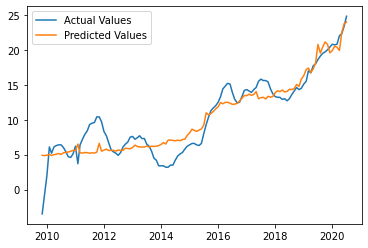

In [188]:
#Show predict and real values
plt.plot(Inf4['InflationRate'], label = "Actual Values")
plt.plot(Inflation_prediction_est2_1, label = "Predicted Values")
plt.legend()
plt.show()

#### Compare Model Name *est* with *est1* and *est1_2*

In [189]:
#Found the sums of the squares of the errors of each model
#Compare
print(((est.resid)**2).sum())
print(((est1.resid)**2).sum())
print(((est1_2.resid)**2).sum())

5608.987721256226
773.4925006739261
4396.48146805825


In [190]:
#Found Numerator 
#Numerator = (SQE−(SQE1 + SQE2)) / k
SQE=((est.resid)**2).sum()
SQE1=((est1.resid)**2).sum()
SQE2=((est1_2.resid)**2).sum()
k=5 #Number of variables
Numerator2003 = (SQE - (SQE1 + SQE2)) / k
Numerator2003

87.80275050480995

In [191]:
#Found Denominator
#Denominator = (SQE1 + SQE2) / (N-2K)
N= 283 #Number of observation
Denominator2003 = (SQE1 + SQE2) / (N-2*k)
Denominator2003

18.937633585099547

In [192]:
#Print Show P
Chow2003=Numerator2003/Denominator2003
Chow2003

4.636416166267714

This model has a degree of freedom of 5 in the numerator and 273 in the denominator.
We will then use table F to confirm or deny H0.

F Table values give 2.24 for 5 degree of freedom in numerator and 273 in denominator. The Chow2003 values is Higher than F table Values, that's means we have a p_value less than 0.05 and this confirm that This means that in September 2003, the Haitian economy experienced a structural rupture of its components.

In September 2003, the assassination of Amiot Metayer provoked the GNB movement and led to the overthrow of Aristide in February 2004.
During the period from September 2003 to February 2004, much of the Haitian economy was in a state of slow motion.

#### Compare Model Name *est* with *est2* and *est2_1*

In [193]:
#Found the sums of the squares of the errors of each model
#Compare
print(((est.resid)**2).sum())
print(((est2.resid)**2).sum())
print(((est2_1.resid)**2).sum())

5608.987721256226
3717.6163487153867
523.6013792314735


In [194]:
#Found Numerator 
#Numerator = (SQE−(SQE1 + SQE2)) / k
SQE=((est.resid)**2).sum()
SQE2_0=((est2.resid)**2).sum()
SQE2_1=((est2_1.resid)**2).sum()
k=5 #Number of variables
Numerator2009 = (SQE - (SQE2_0 + SQE2_1)) / k
Numerator2009

273.5539986618731

In [195]:
#Found Denominator
#Denominator = (SQE1 + SQE2) / (N-2K)
N= 283 #Number of observation
Denominator2009 = (SQE2_0 + SQE2_1) / (N-2*k)
Denominator2009

15.535596073065424

In [196]:
#Print Show P
Chow2009=Numerator2009/Denominator2009
Chow2009

17.608207459522117

F Table values give 2.24 for 5 degree of freedom in numerator and 273 in denominator. The Chow2009 values -17.60 is Higher than F table Values, that's means we have a p_value less than 0.05 and this confirm that This means that in October 2009, the Haitian economy experienced a structural rupture of its components.

All this could be explained by the political crisis that started in April 2008 and continued until 2009 impacting the level of public security. It could also be the cause of the demonstrations that paralyzed the country.

#### Test of specification

In statistics, the Ramsey Regression Equation Specification Error Test test is a general specification test for the linear regression model. More specifically, it tests whether non-linear combinations of the fitted values help explain the response variable.

In [197]:
import statsmodels.tools.tools as ct
import statsmodels.regression.linear_model as rg
import statsmodels.stats.diagnostic as dg

In [198]:
const= ct.add_constant(Inf_Forecast)
variables=['const',"M3","ChangeRate", "PoliciesRate", "IMP_HT" ] # "PoliciesRate", "IMP_HT", "EXP_HT"
reg=sm.OLS(const['InflationRate'],const[variables], hasconst=bool).fit()
reset=dg.linear_reset(reg, power=2, test_type= 'fitted', use_f=True)

C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [199]:
print ("=== Correct Functionnal for Ramsay-Reset Test ===")
print(' ')
print("Ramsay-RESET test F-Statistic: ", np.round(reset.fvalue, 6))
print("Ramsay-RESET Test P-Value: ", np.round(reset.pvalue, 6))

=== Correct Functionnal for Ramsay-Reset Test ===
 
Ramsay-RESET test F-Statistic:  [[24.994865]]
Ramsay-RESET Test P-Value:  1e-06


#### Based on Ramsay Test values , we can estimate that the OLS Model is not good specifies enough

##### MODEL 2

In [200]:
#Create Variables for new model training named est3
X4_1 = Inf4[["PoliciesRate" , "ChangeRate" ]]  #"EXP_HT","IMP_HT",'PoliciesRate' , "M3"
y4_1 = Inf4['InflationRate']
## fit a OLS model with intercept on TV and Radio
X4_1 = sm.add_constant(X4_1)
est2_1_1 = sm.OLS(y4_1, X4_1).fit()
est2_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          InflationRate   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     378.6
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           5.27e-54
Time:                        12:11:25   Log-Likelihood:                -278.49
No. Observations:                 129   AIC:                             563.0
Df Residuals:                     126   BIC:                             571.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.8120      0.647     -7.437      0.000      -6.093      -3.531
PoliciesRate     0.1686      0.054      3.112      0.002       0.061       0.276
ChangeRate       0.2419      0.016     15.226      0.000       0.210       0.273
==============================================================================
Omnibus:                       26.859   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.841
Skew:                          -0.771   Prob(JB):                     6.83e-16
Kurtosis:                       6.258   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
#Inflation Forecasting with OLS Model
Inflation_prediction_est2_1_1 = est2_1_1.predict(X4_1)
print(Inflation_prediction_est2_1_1)

index
2009-10-31     6.195790
2009-11-30     6.195790
2009-12-31     6.193903
2010-01-31     5.375990
2010-02-28     5.375990
                ...    
2020-02-29    20.542034
2020-03-31    20.569965
2020-04-30    21.745886
2020-05-31    23.223115
2020-06-30    24.280210
Length: 129, dtype: float64


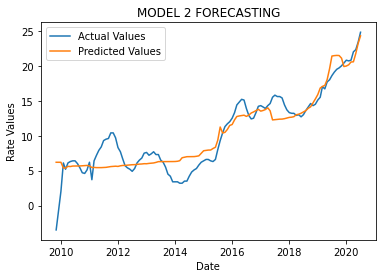

In [202]:
#Show predict and real values
plt.plot(Inf4['InflationRate'], label = "Actual Values")
plt.plot(Inflation_prediction_est2_1_1, label = "Predicted Values")
plt.legend()
plt.title("MODEL 2 FORECASTING")
plt.xlabel('Date')
plt.ylabel('Rate Values')
plt.show()

#### Let's do the approval Test for Model 2

##### Multicolinearite Test2 (VIF)

In [203]:
#Determine Independant variable
X_variables_Model2 = Inf4[['PoliciesRate' ,"ChangeRate"]]

In [204]:
vif_data_model_2 = pd.DataFrame()
vif_data_model_2["feature"] = X_variables_Model2.columns
vif_data_model_2["VIF"] = [variance_inflation_factor(X_variables_Model2.values, i) for i in range(len(X_variables_Model2.columns))]

In [205]:
vif_data_model_2

,feature,VIF
0,PoliciesRate,7.828813
1,ChangeRate,7.828813


###### Hommocedasticity Test2

In [206]:
#Perform hommocedasticity test
white_test_model2 = het_white(est2_1_1.resid,  est2_1_1.model.exog)
white_test_model2

(7.422989250397887,
 0.19103412553629953,
 1.5019742172792787,
 0.19403948714790425)

In [207]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test_model2)))

{'LM Statistic': 7.422989250397887, 'LM-Test p-value': 0.19103412553629953, 'F-Statistic': 1.5019742172792787, 'F-Test p-value': 0.19403948714790425}


Model 2 is hommocesdastic.

###### Significance Test 2

As you can see at line 211, p-value of each independants variables is less than 5%, that's means each variables is highly significance for the model.  

##### Test of normality of error (Jacque Bera)

As you can see at line 211, Jacque-Bera p-value , skewness and Kurtosis of the Model suggest that the data follow a normal distribution.

#### Test of specification

In [208]:
const= ct.add_constant(Inf4)
variables2=['const','ChangeRate', "PoliciesRate"]
reg2=sm.OLS(const['InflationRate'],const[variables2], hasconst=bool).fit()
reset2=dg.linear_reset(reg2, power=2, test_type= 'fitted', use_f=True)

C:\Users\DDG\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [209]:
print ("=== Correct Functionnal for Ramsay-Reset Test ===")
print(' ')
print("Ramsay-RESET test F-Statistic: ", np.round(reset2.fvalue, 6))
print("Ramsay-RESET Test P-Value: ", np.round(reset2.pvalue, 6))

=== Correct Functionnal for Ramsay-Reset Test ===
 
Ramsay-RESET test F-Statistic:  [[1.808127]]
Ramsay-RESET Test P-Value:  0.181168


Based on Ramsay Test values , we can estimate that the OLS Model have good specification.

IV. ANALYTICAL MODELS

    A.    Document techniques 
    B.    Document uncertainties
    C.    Performance of different models

A.    Document techniques 

In order to proceed with this prediction test on the level of inflation in Haiti, I conducted a literature review on :

- on time series.

- economic law.

- the economic requirements.

You can visit the sources in references.

B.    Document uncertainties



In model 1, we see that the regression coefficient of M3 suggests that the increase of the money supply causes the decrease of the inflation level. 

This is contrary to the theoretical prediction, but can be explained by the iterative method of machine learning. 
The computer had to find the equation that could best describe the observed results.
Model 1 was not able to predict with a very high accuracy the evolution of the inflation rate beyond 6 months.
This could be due to the regular disruptions that the Haitian economy faces.




Model 2 was built to correct the flaws of model 1, it took into account the most important variables of the 2009-2020 period, namely the exchange rate and the policy interest rate.
It provides an equation closer to reality, but still does not seem to be able to incorporate shocks (peaks or troughs) that are too important in the variation of the inflation rate.

It still remains at an acceptable level of accuracy beyond the 6 month forecast.

C.    Performance of different models

Model 1 developed an accuracy of about 61,7% which is acceptable from an economical point of view. But it did not pass the tests: RAMSAY, HOMMOCEDASTICITY.

Model 2 was built as a correction of model 1, it achieved an accuracy of 85,7% and passed all the tests: INDIVIDUAL SIGINIFICACY, GLOBAL SIGINIFICACY, HOMMOCEDASTICITY, MULTICOLINEARITY, PARAMETER STABILITY, MODEL SPECIFICATION TEST, ERROR NORMALITY TEST. ETC...

V.	DISCUSSION AND CONCLUSION

    A.	Solution to the problem
    B.	Further directions

###### Solutions and  Recommandations

It will be necessary to be aware of the risk that an economy undermined by a stagnation of growth combined with a high rate of inflation and unemployment runs.

- A policy of economic recovery should be launched, prioritizing real investment (public infrastructure works, for example).

- A priority fight against insecurity should also be on the agenda of public officials in order to improve the performance of investments, and this should be done within 12 months at the most.

- Lower interest rates for a period of 3 to 5 years on investment loans will support entrepreneurs.

- A policy of long-term financial independence from the United States should be pursued to reduce the sensitivity of the Haitian economy to imported inflation and foreign exchange.

- A limitation of the power of price manipulation of certain actors (large distributors) by reestablishing state-owned warehouses, subject to a balanced and uncorrupted administration of these warehouses.


B.    Further directions

A deep learning component can be integrated to the model in order to improve the accuracy of the model. 
We can try the LSTM method, or use the Prophet Module developed by Facebook.
The stability and specificity parameters of the model should not vary too much.

### References.

https://www.kaggle.com/andreshg/timeseries-analysis-a-complete-guide

https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/#:~:text=Builiding%20the%20Logistic%20Regression%20model%20%3A%20Statsmodels%20is,dependent%28%20y%20%29%20and%20independent%28%20X%20%29%20variables.

http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2018/04/TasksP_06.html

https://medium.com/analytics-vidhya/inflation-forecasting-with-deep-learning-d3067711fff1

https://timeseriesreasoning.com/contents/inflation-adjustment/

https://builtin.com/data-science/time-series-python

https://nbviewer.ipython.org/urls/s3.amazonaws.com/datarobotblog/notebooks/multiple_regression_in_python.ipynb

https://www.datarobot.com/blog/multiple-regression-using-statsmodels/

https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html


https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=28089


https://www.institut-numerique.org/iii23-test-de-specification-524eb85ef138f

https://thequackdaddy.github.io/statsmodels.github.io/0.9.0/generated/statsmodels.regression.linear_model.OLSResults.html

https://www.supagro.fr/cnam-lr/statnet/tables.htm

https://www.memoireonline.com/01/10/3090/m_Evaluation-de-lefficience-technique-des-exploitations-riricoles-du-perimetre-irrigu16.html

https://ichi.pro/fr/comprendre-la-multicolinearite-et-comment-la-detecter-en-python-51822815532764

https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/homoscedasticity/

https://perso.univ-rennes1.fr/isabelle.cadoret-david/econometrie/lexique/teststatistique.htm

https://perso.univ-rennes1.fr/isabelle.cadoret-david/econometrie/regmultiple/essence.prg

https://www.math.univ-toulouse.fr/~besse/pub/Appren_stat.pdf

https://xavierdatascience.wordpress.com/2018/08/06/rlm-ii-contraste-de-cambio-estructural-de-chow/

https://medium.com/@remycanario17/the-chow-test-dealing-with-heterogeneity-in-python-1b9057f0f07a

https://pypi.org/project/chowtest/
